In [2]:
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt   
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
plt.rcParams.update({"axes.grid" : True, "grid.color": "black", "grid.alpha":"0.25", "grid.linestyle": "--"})
plt.rcParams.update({'font.size': 14})
from HANKModel import HANKModelClass
from funktioner import *
import numba as nb  
import pickle
from types import SimpleNamespace

In [3]:
import importlib, funktioner
importlib.reload(funktioner)

<module 'funktioner' from 'c:\\Users\\B307102\\Desktop\\priv\\SpecialeHANK\\Adv_macro_het_agents\\AdvMacroHet\\Speciale 2025\\REN TIL GIT\\funktioner.py'>

In [4]:
# --- use YOUR package-level exports (this works with your repo) ---
from GEModelTools import (
    simulate_hh_forwards_exo_transpose,    # OK in your version
    simulate_hh_forwards_endo_transpose    # OK in your version
)  # :contentReference[oaicite:2]{index=2}

In [5]:
model = HANKModelClass(name='baseline')
model.find_ss(do_print=True)
model._compute_jac_hh()
model.calc_MPC()
model.compute_jacs(skip_hh=False,skip_shocks=False)
model.find_IRFs(shocks=['eps_i'],do_print=False)


 Y =   1.0000
 r    =   0.0050
 A    =   1.2237
 pD   =   1.2237
Discrepancy in A =  -0.00000002
Discrepancy in Y =   0.00000000
MPC = 0.33, iMPC[0,0] = 0.33
annual_MPC = 0.50


In [6]:

model_B = HANKModelClass(name='baseline')
model_B.par.do_B = True
model_B.find_ss(do_print=True)
model_B._compute_jac_hh()
model_B.calc_MPC()

model_B.compute_jacs(skip_hh=False,skip_shocks=False)
model_B.find_IRFs(shocks=['eps_i'],do_print=False)


 Y =   1.0000
 r    =   0.0050
 A    =   1.2283
 pD   =   0.0000
Discrepancy in A =   0.00000000
Discrepancy in Y =   0.00000000
MPC = 0.33, iMPC[0,0] = 0.33
annual_MPC = 0.50


In [7]:
model_sticky_B = model_B.copy()

In [8]:

model_B_het = model_B.copy(name='heterogeneous beliefs')

In [9]:
model_sticky_B.find_ss(do_print=True)
model_sticky_B._compute_jac_hh()
model_sticky_B.calc_MPC()

model_sticky_B.compute_jacs(skip_hh=False,skip_shocks=False)
model_sticky_B.find_IRFs(shocks=['eps_i'],do_print=False)

 Y =   1.0000
 r    =   0.0050
 A    =   1.2283
 pD   =   0.0000
Discrepancy in A =   0.00000000
Discrepancy in Y =   0.00000000
MPC = 0.33, iMPC[0,0] = 0.33
annual_MPC = 0.50


In [10]:
model_B_het.find_ss(do_print=True)
model_B_het._compute_jac_hh()
model_B_het.calc_MPC()

model_B_het.compute_jacs(skip_hh=False,skip_shocks=False)
model_B_het.find_IRFs(shocks=['eps_i'],do_print=False)


 Y =   1.0000
 r    =   0.0050
 A    =   1.2283
 pD   =   0.0000
Discrepancy in A =   0.00000000
Discrepancy in Y =   0.00000000
MPC = 0.33, iMPC[0,0] = 0.33
annual_MPC = 0.50


In [11]:
compute_jac_hh_z(model, dx=1e-4, do_print=True)

computing per-z household Jacobians (direct method)...
finding Jacobian wrt. ghost          : 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251 252 253 

{('A_hh',
  'Z'): array([[[ 6.81735805e-05, -2.02234118e-05, -1.40000779e-05, ...,
          -1.35525272e-15, -1.35525272e-15, -1.35525272e-15],
         [ 6.34216791e-05,  5.60208663e-05, -3.23008850e-05, ...,
          -3.52365706e-15, -3.52365706e-15, -3.25260652e-15],
         [ 6.09404372e-05,  5.47128411e-05,  4.71504822e-05, ...,
          -8.94466792e-15, -8.13151629e-15, -7.58941521e-15],
         ...,
         [ 5.58280906e-10,  5.61591518e-10,  5.66558519e-10, ...,
          -2.63319307e-05, -1.13403485e-04, -1.01223481e-04],
         [ 5.33589286e-10,  5.36753801e-10,  5.41500980e-10, ...,
          -1.98017054e-05, -2.63319307e-05, -1.13403485e-04],
         [ 5.09989186e-10,  5.13013839e-10,  5.17551225e-10, ...,
          -1.45680557e-05, -1.98017054e-05, -2.63319307e-05]],
 
        [[ 1.21017248e-03, -3.27571470e-04, -2.30320585e-04, ...,
          -4.33680869e-14, -4.33680869e-14, -3.90312782e-14],
         [ 1.12945375e-03,  1.01433607e-03, -5.20647983e-04, ...,
    

In [12]:
compute_jac_hh_z(model_B, dx=1e-4, do_print=True)

computing per-z household Jacobians (direct method)...
finding Jacobian wrt. ghost          : 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251 252 253 

{('A_hh',
  'Z'): array([[[ 6.81676175e-05, -2.02502990e-05, -1.40139701e-05, ...,
          -1.08420217e-15, -1.08420217e-15, -1.08420217e-15],
         [ 6.34027248e-05,  5.60009760e-05, -3.23403025e-05, ...,
          -3.25260652e-15, -2.98155597e-15, -2.98155597e-15],
         [ 6.09095637e-05,  5.46851201e-05,  4.71228973e-05, ...,
          -7.58941521e-15, -7.31836466e-15, -6.77626358e-15],
         ...,
         [ 5.38735994e-10,  5.41945232e-10,  5.46743911e-10, ...,
          -2.62896590e-05, -1.13373924e-04, -1.01169350e-04],
         [ 5.14850478e-10,  5.17917957e-10,  5.22503590e-10, ...,
          -1.97647814e-05, -2.62896590e-05, -1.13373924e-04],
         [ 4.92023956e-10,  4.94955097e-10,  4.99337713e-10, ...,
          -1.45397913e-05, -1.97647814e-05, -2.62896590e-05]],
 
        [[ 1.21094809e-03, -3.28228817e-04, -2.30726210e-04, ...,
          -4.33680869e-14, -3.90312782e-14, -3.90312782e-14],
         [ 1.12985893e-03,  1.01475353e-03, -5.21626206e-04, ...,
    

In [13]:
compute_jac_hh_z(model_sticky_B, dx=1e-4, do_print=True)

computing per-z household Jacobians (direct method)...
finding Jacobian wrt. ghost          : 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251 252 253 

{('A_hh',
  'Z'): array([[[ 6.81676175e-05, -2.02502990e-05, -1.40139701e-05, ...,
          -1.08420217e-15, -1.08420217e-15, -1.08420217e-15],
         [ 6.34027248e-05,  5.60009760e-05, -3.23403025e-05, ...,
          -3.25260652e-15, -2.98155597e-15, -2.98155597e-15],
         [ 6.09095637e-05,  5.46851201e-05,  4.71228973e-05, ...,
          -7.58941521e-15, -7.31836466e-15, -6.77626358e-15],
         ...,
         [ 5.38735994e-10,  5.41945232e-10,  5.46743911e-10, ...,
          -2.62896590e-05, -1.13373924e-04, -1.01169350e-04],
         [ 5.14850478e-10,  5.17917957e-10,  5.22503590e-10, ...,
          -1.97647814e-05, -2.62896590e-05, -1.13373924e-04],
         [ 4.92023956e-10,  4.94955097e-10,  4.99337713e-10, ...,
          -1.45397913e-05, -1.97647814e-05, -2.62896590e-05]],
 
        [[ 1.21094809e-03, -3.28228817e-04, -2.30726210e-04, ...,
          -4.33680869e-14, -3.90312782e-14, -3.90312782e-14],
         [ 1.12985893e-03,  1.01475353e-03, -5.21626206e-04, ...,
    

In [14]:
compute_jac_hh_z(model_B_het, dx=1e-4, do_print=True)

computing per-z household Jacobians (direct method)...
finding Jacobian wrt. ghost          : 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251 252 253 

{('A_hh',
  'Z'): array([[[ 6.81676175e-05, -2.02502990e-05, -1.40139701e-05, ...,
          -1.08420217e-15, -1.08420217e-15, -1.08420217e-15],
         [ 6.34027248e-05,  5.60009760e-05, -3.23403025e-05, ...,
          -3.25260652e-15, -2.98155597e-15, -2.98155597e-15],
         [ 6.09095637e-05,  5.46851201e-05,  4.71228973e-05, ...,
          -7.58941521e-15, -7.31836466e-15, -6.77626358e-15],
         ...,
         [ 5.38735994e-10,  5.41945232e-10,  5.46743911e-10, ...,
          -2.62896590e-05, -1.13373924e-04, -1.01169350e-04],
         [ 5.14850478e-10,  5.17917957e-10,  5.22503590e-10, ...,
          -1.97647814e-05, -2.62896590e-05, -1.13373924e-04],
         [ 4.92023956e-10,  4.94955097e-10,  4.99337713e-10, ...,
          -1.45397913e-05, -1.97647814e-05, -2.62896590e-05]],
 
        [[ 1.21094809e-03, -3.28228817e-04, -2.30726210e-04, ...,
          -4.33680869e-14, -3.90312782e-14, -3.90312782e-14],
         [ 1.12985893e-03,  1.01475353e-03, -5.21626206e-04, ...,
    

In [15]:
sticky_vars=['Z','ra','chi']

In [16]:
theta_vec_Z  = [0.818, 0.773, 0.75,  0.737, 0.722, 0.714, 0.706, 0.687, 0.667]
theta_vec_ra = [0.818, 0.773, 0.75,  0.737, 0.722, 0.714, 0.706, 0.687, 0.667]
theta_vec_chi = [0.818, 0.773, 0.75,  0.737, 0.722, 0.714, 0.706, 0.687, 0.667]

decay_vec_Z = np.array([0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99])
decay_vec_ra = np.array([0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99])
decay_vec_chi = np.array([0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99])

E_by_z_sticky = build_E_by_z_sticky(theta_vec_Z=theta_vec_Z, theta_vec_ra=theta_vec_ra, theta_vec_chi=theta_vec_chi,
                                    decay_vec_Z=decay_vec_Z, decay_vec_ra=decay_vec_ra, decay_vec_chi=decay_vec_chi, T=300)

E_scalar = E_sticky_exp(0.935, T=model.par.T)

In [17]:
theta_vec_Z_sticky  = [0.935, 0.935, 0.935, 0.935, 0.935, 0.935, 0.935, 0.935, 0.935]
theta_vec_ra_sticky = [0.935, 0.935, 0.935, 0.935, 0.935, 0.935, 0.935, 0.935, 0.935]
theta_vec_chi_sticky  = [0.935, 0.935, 0.935, 0.935, 0.935, 0.935, 0.935, 0.935, 0.935]

decay_vec_Z_sticky = np.array([1, 1, 1, 1, 1, 1, 1, 1, 1])
decay_vec_ra_sticky = np.array([1, 1, 1, 1, 1, 1, 1, 1, 1])
decay_vec_chi_sticky = np.array([1, 1, 1, 1, 1, 1, 1, 1, 1])
E_by_z_sticky_model = build_E_by_z_sticky(theta_vec_Z=theta_vec_Z_sticky, theta_vec_ra=theta_vec_ra_sticky, theta_vec_chi=theta_vec_chi_sticky,
                                    decay_vec_Z=decay_vec_Z_sticky, decay_vec_ra=decay_vec_ra_sticky, decay_vec_chi=decay_vec_chi_sticky, T=300)

E_scalar = E_sticky_exp(0.935, T=model.par.T)


In [18]:

apply_heterogeneous_expectations_by_z(
    model_fire    = model_B,
    model_beliefs = model_sticky_B,
    E_by_z_sane   = E_by_z_sticky_model,
    sticky_vars   = ('Z','ra','chi'),
    outputs       = ('C_hh','A_hh'),
    overwrite_aggregate = True
)
model_sticky_B.compute_jacs(skip_hh=True, skip_shocks=False, do_print=False)
model_sticky_B.find_IRFs(shocks=['eps_i'], do_print=False)

In [19]:
apply_heterogeneous_expectations_by_z(
    model_fire    = model_B,
    model_beliefs = model_B_het,
    E_by_z_sane   = E_by_z_sticky,
    sticky_vars   = ('Z','ra','chi'),
    outputs       = ('C_hh','A_hh'),
    overwrite_aggregate = True
)
model_B_het.compute_jacs(skip_hh=True, skip_shocks=False, do_print=False)
model_B_het.find_IRFs(shocks=['eps_i'], do_print=False)


FIGURES

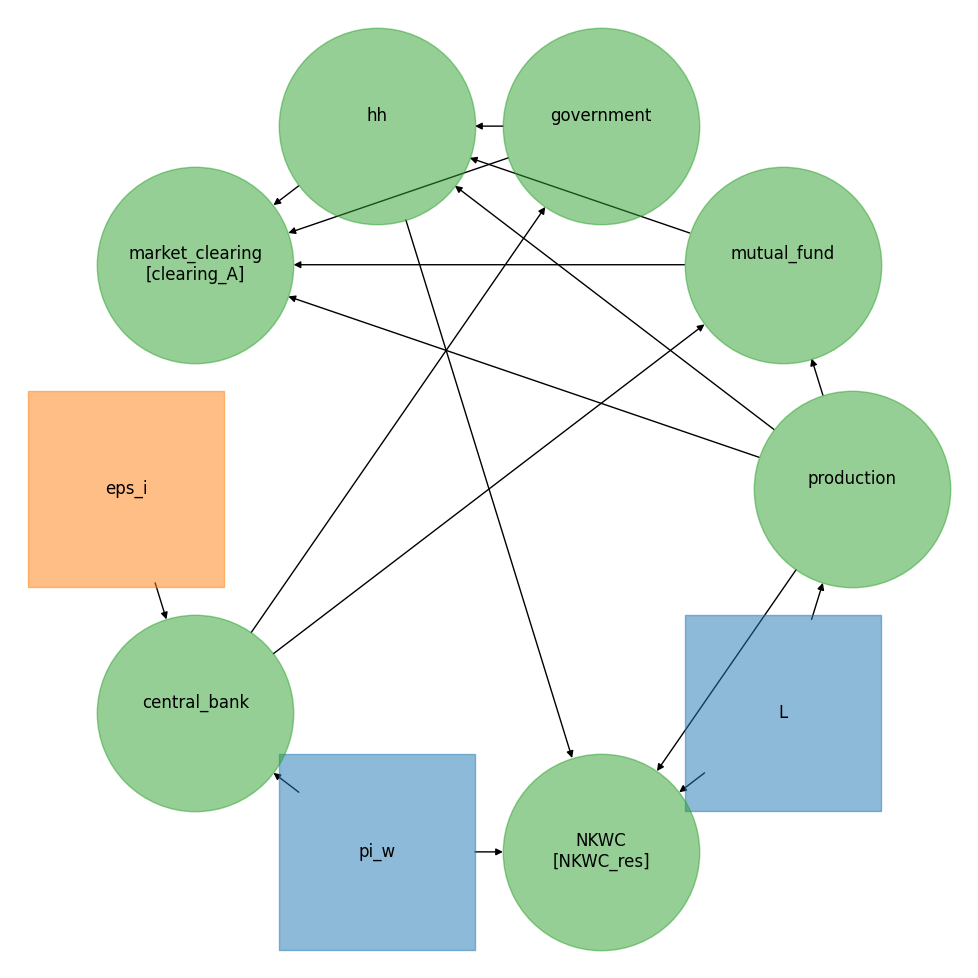

In [20]:
model.draw_DAG(figsize=(10,10))

BASELINE EQUITY

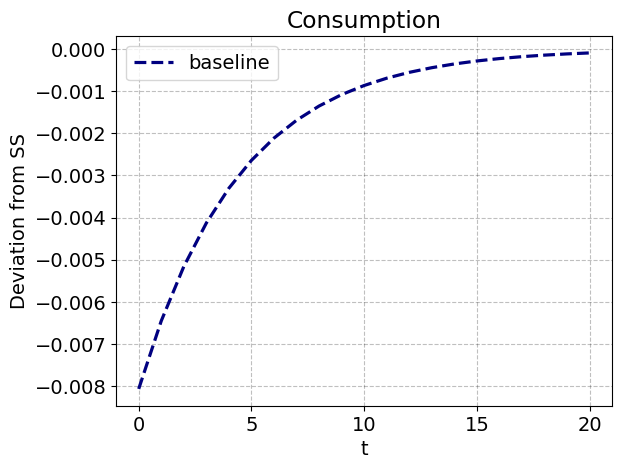

In [21]:
plt.plot(model.IRF['C_hh'][:21], label='baseline', linestyle='--', linewidth=2.3, color='navy')
plt.title('Consumption')
plt.ylabel("Deviation from SS")
plt.xlabel("t")
plt.legend()
plt.show()

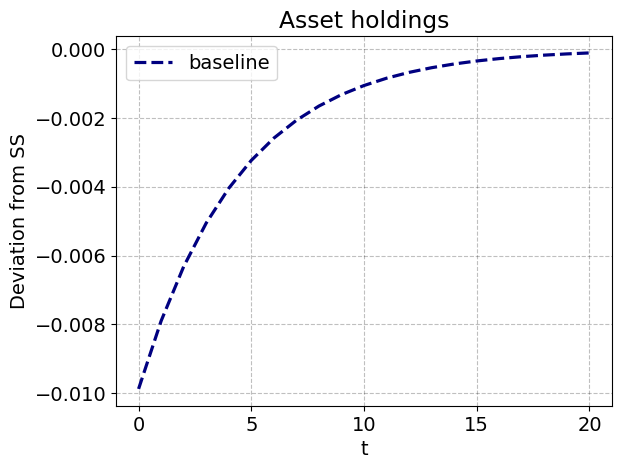

In [22]:
plt.plot(model.IRF['A_hh'][:21], label='baseline', linestyle='--', linewidth=2.3, color='navy')
plt.title('Asset holdings')
plt.ylabel("Deviation from SS")
plt.xlabel("t")
plt.legend()
plt.show()

In [23]:
# Grids
a = model.par.a_grid           # (Na,)
z = model.par.z_grid           # (Nz,)
D = model.ss.D                 # (Nfix, Nz, Na)

# Collapse over fixed types if present
D = D.sum(axis=0)              # (Nz, Na)

# Flatten
mass   = D.flatten()
assets = np.tile(a, model.par.Nz)
income = np.repeat(z, len(a))  # proportional to productivity


In [24]:
def lorenz_from_distribution(values, weights):
    """
    values  : array of income or wealth
    weights : population weights (must sum to 1)
    """
    order = np.argsort(values)
    values = values[order]
    weights = weights[order]

    cum_pop = np.cumsum(weights)
    cum_val = np.cumsum(weights * values)
    cum_val /= cum_val[-1]

    return cum_pop, cum_val



In [25]:
pop_w, lorenz_w = lorenz_from_distribution(assets, mass)
pop_y, lorenz_y = lorenz_from_distribution(income, mass)


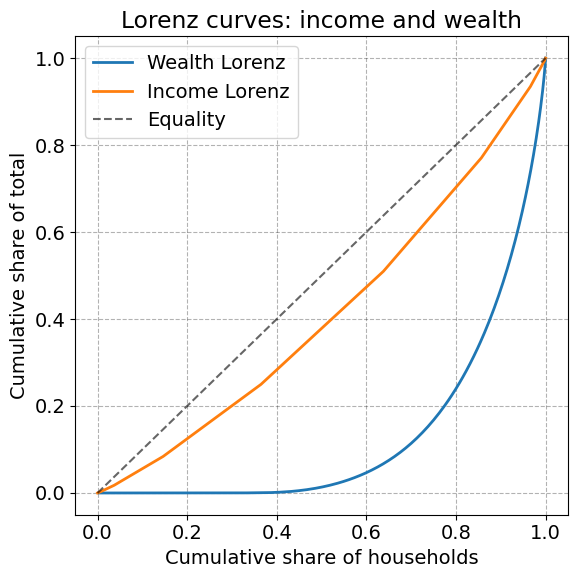

In [26]:
plt.figure(figsize=(6,6))

plt.plot(pop_w, lorenz_w, label="Wealth Lorenz", linewidth=2)
plt.plot(pop_y, lorenz_y, label="Income Lorenz", linewidth=2)

# 45-degree line
plt.plot([0,1], [0,1], 'k--', alpha=0.6, label="Equality")

plt.xlabel("Cumulative share of households")
plt.ylabel("Cumulative share of total")
plt.title("Lorenz curves: income and wealth")
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

[decomp] agg_mode auto-chosen: sum  max|diff|=1.78e-07
[decomp] max|agg(from z, policy-only) − IRF| = 1.78e-07
[decomp] residual range: [-7.972e-08, 1.784e-07]


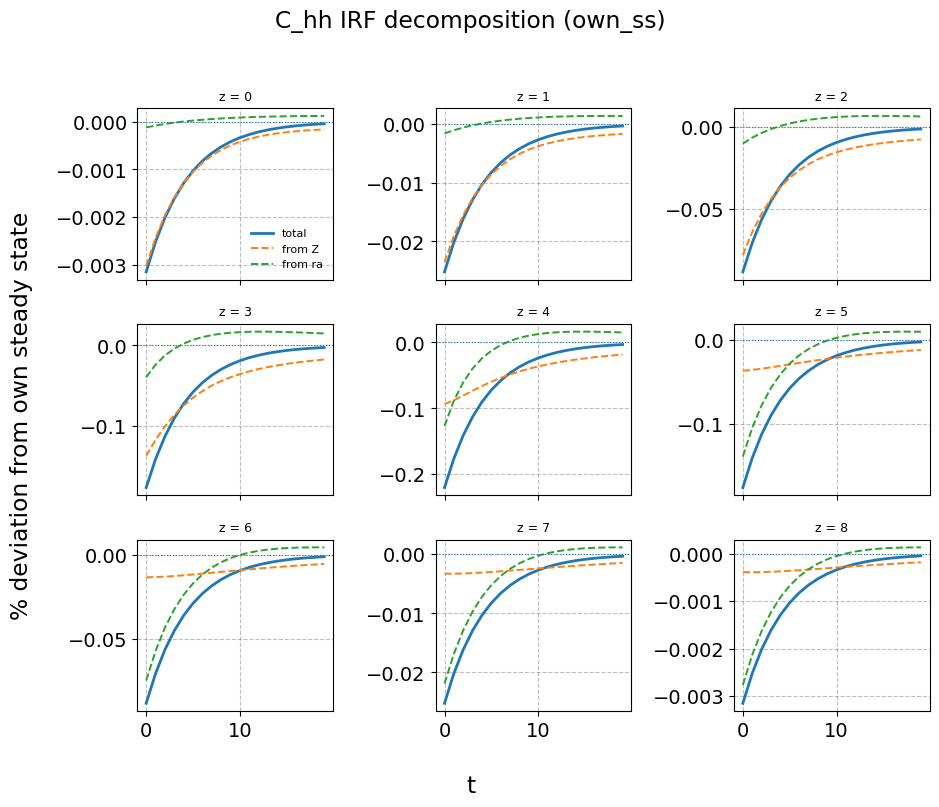

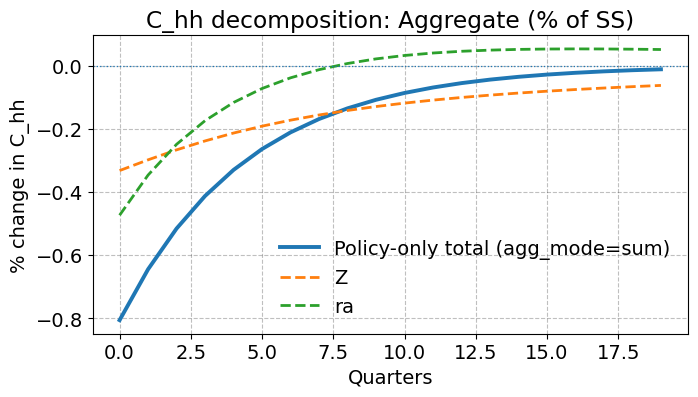

(array([[-1.22751961e-05, -9.81931578e-06, -7.85522477e-06,
         -6.28409343e-06, -5.02745866e-06, -4.02163915e-06,
         -3.21726039e-06, -2.57406566e-06, -2.05869717e-06,
         -1.64708344e-06, -1.31792010e-06, -1.05404669e-06,
         -8.42759842e-07, -6.74584816e-07, -5.39851304e-07,
         -4.31567360e-07, -3.45413495e-07, -2.76673470e-07,
         -2.21520247e-07, -1.77064035e-07],
        [-1.24200049e-04, -9.93520467e-05, -7.94789948e-05,
         -6.35831822e-05, -5.08678579e-05, -4.06916450e-05,
         -3.25537359e-05, -2.60429848e-05, -2.08318724e-05,
         -1.66630314e-05, -1.33345405e-05, -1.06655886e-05,
         -8.52638423e-06, -6.82390715e-06, -5.46064918e-06,
         -4.36731550e-06, -3.49444519e-06, -2.79732602e-06,
         -2.24001902e-06, -1.79213855e-06],
        [-5.51772898e-04, -4.41393167e-04, -3.53065730e-04,
         -2.82449607e-04, -2.25958245e-04, -1.80745687e-04,
         -1.44604717e-04, -1.15676847e-04, -9.25427883e-05,
         -7.

In [27]:
plot_by_z_with_input_decomp_norm(
    model=model,
    inputs=("Z", "ra"),
    output="C_hh",
    T=20,
    norm_mode="own_ss",           # "none" | "own_ss" | "elasticity"
    shock_var=None,             # required for elasticity
    title_prefix=None,
    plot_aggregate=True,
    overlay_true_agg_irf=False,
    add_distribution_residual=False,
    agg_mode="auto",
    # --- NEW: baseline overlay ---
    overlay_baseline_total_by_z=False,
    baseline_model=model_sticky_B,
    baseline_label="Homo sticky total (per z)",
    common_yaxis=False
)

BASELINE BONDS

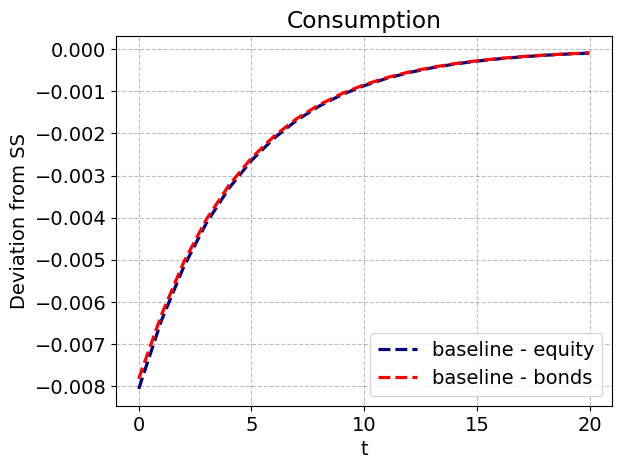

In [28]:
plt.plot(model.IRF['C_hh'][:21], label='baseline - equity', linestyle='--', linewidth=2.3, color='navy')
plt.plot(model_B.IRF['C_hh'][:21], label='baseline - bonds', linestyle='--', linewidth=2.3, color='red')
plt.title('Consumption')
plt.ylabel("Deviation from SS")
plt.xlabel("t")
plt.legend()
plt.show()


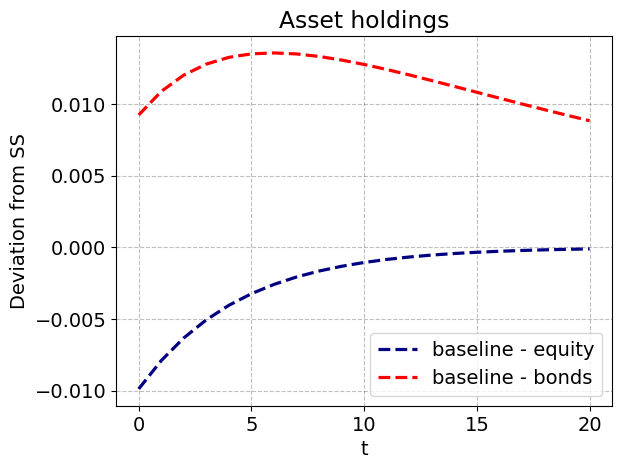

In [29]:
plt.plot(model.IRF['A_hh'][:21], label='baseline - equity', linestyle='--', linewidth=2.3, color='navy')
plt.plot(model_B.IRF['A_hh'][:21], label='baseline - bonds', linestyle='--', linewidth=2.3, color='red')
plt.title('Asset holdings')
plt.ylabel("Deviation from SS")
plt.xlabel("t")
plt.legend()
plt.show()

[decomp] agg_mode auto-chosen: sum  max|diff|=1.70e-07
[decomp] max|agg(from z, policy-only) − IRF| = 1.70e-07
[decomp] residual range: [-8.094e-08, 1.701e-07]


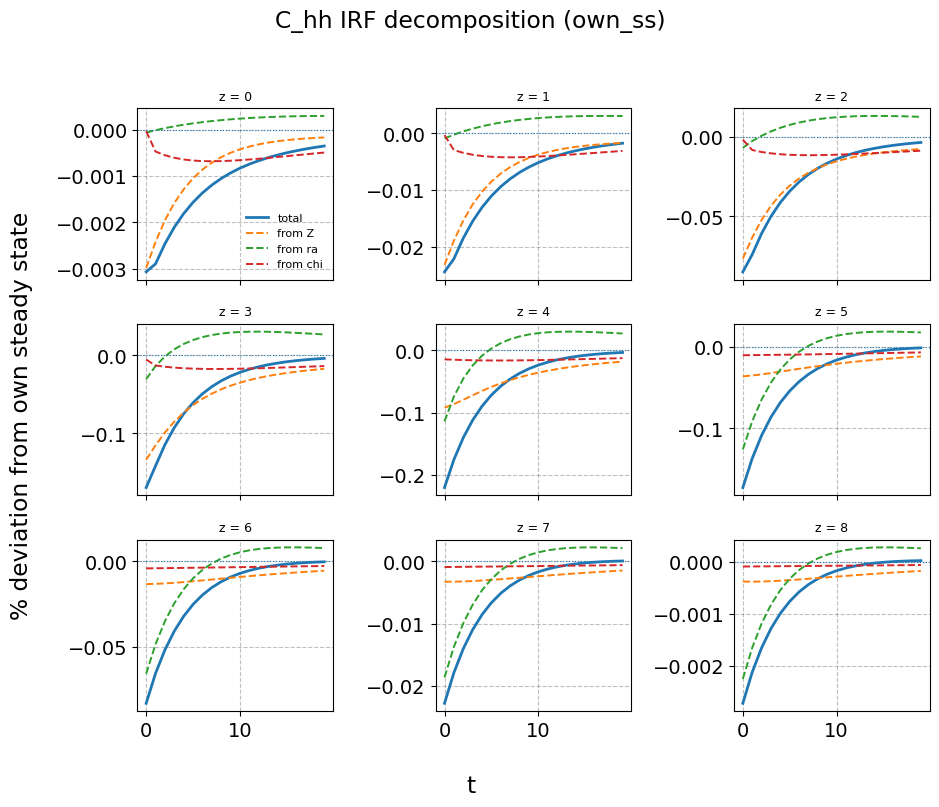

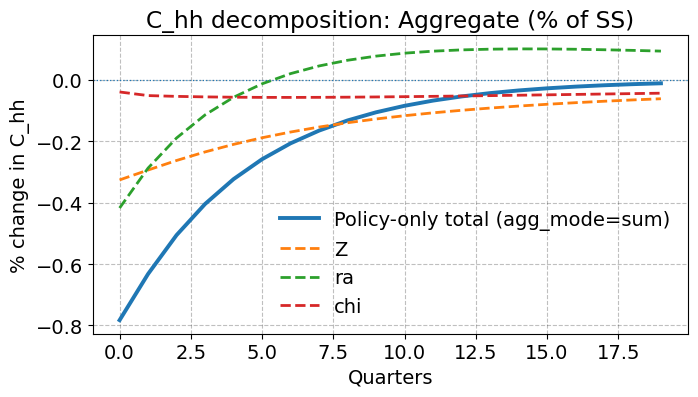

(array([[-1.18462020e-05, -1.11773130e-05, -9.50326389e-06,
         -8.12328139e-06, -6.98510739e-06, -6.04325166e-06,
         -5.25960617e-06, -4.60409864e-06, -4.05417751e-06,
         -3.58916836e-06, -3.19363910e-06, -2.85614205e-06,
         -2.56652092e-06, -2.31532753e-06, -2.09685693e-06,
         -1.90635371e-06, -1.73853727e-06, -1.58997793e-06,
         -1.45802674e-06, -1.34063801e-06],
        [-1.19430393e-04, -1.08208899e-04, -9.04046586e-05,
         -7.58156712e-05, -6.38670370e-05, -5.40586274e-05,
         -4.59757210e-05, -3.92945077e-05, -3.37547983e-05,
         -2.91432176e-05, -2.52781881e-05, -2.20356329e-05,
         -1.93050795e-05, -1.69833697e-05, -1.50039627e-05,
         -1.33115764e-05, -1.18549130e-05, -1.05940540e-05,
         -9.49783437e-06, -8.54287063e-06],
        [-5.28999509e-04, -4.60850067e-04, -3.78460043e-04,
         -3.11305401e-04, -2.56721551e-04, -2.12330388e-04,
         -1.76107482e-04, -1.46536552e-04, -1.22324408e-04,
         -1.

In [30]:
plot_by_z_with_input_decomp_norm(
    model=model_B,
    inputs=("Z", "ra","chi"),
    output="C_hh",
    T=20,
    norm_mode="own_ss",           # "none" | "own_ss" | "elasticity"
    shock_var=None,             # required for elasticity
    title_prefix=None,
    plot_aggregate=True,
    overlay_true_agg_irf=False,
    add_distribution_residual=False,
    agg_mode="auto",
    # --- NEW: baseline overlay ---
    overlay_baseline_total_by_z=False,
    baseline_model=model_sticky_B,
    baseline_label="Homo sticky total (per z)",
    common_yaxis=False
)

In [31]:
df, Chh_z = table_C_impact_by_z_from_perz_decomp(model_B, per_100bp=True)

[decomp] agg_mode auto-chosen: sum  max|diff|=1.70e-07


In [32]:
print(df)

   z   mass(z)   C_ss(z)  dC0_total  %dC0_total  %dC0_from_ra  %dC0_from_Z  \
0  0  0.003906  0.385751  -0.000012   -0.003071     -0.000058    -0.002985   
1  1  0.031250  0.489503  -0.000119   -0.024398     -0.000914    -0.023172   
2  2  0.109375  0.622957  -0.000529   -0.084917     -0.006727    -0.076546   
3  3  0.218750  0.793989  -0.001349   -0.169862     -0.030532    -0.134035   
4  4  0.273438  0.998181  -0.002200   -0.220382     -0.114043    -0.091924   
5  5  0.218750  1.193750  -0.002062   -0.172757     -0.125968    -0.036361   
6  6  0.109375  1.382294  -0.001149   -0.083101     -0.065808    -0.013253   
7  7  0.031250  1.573745  -0.000358   -0.022776     -0.018616    -0.003256   
8  8  0.003906  1.775123  -0.000048   -0.002726     -0.002256    -0.000380   

   %dC0_from_chi  %dC0_total per 100bp ra  rank_abs  
0      -0.000028                -0.004090         8  
1      -0.000312                -0.032496         6  
2      -0.001645                -0.113102         4  
3  

In [76]:
df = df.copy()
df["rank_abs"] = df["%dC0_total"].abs().rank(ascending=False, method="dense").astype(int)

cols = ["z","mass(z)","%dC0_total","%dC0_total per 100bp ra","%dC0_from_ra","%dC0_from_Z","%dC0_from_chi","rank_abs"]
print(df[cols].to_latex(index=False, float_format="%.4f", caption="Impact consumption sensitivity by z", label="tab:impact_sensitivity_z"))

\begin{table}
\caption{Impact consumption sensitivity by z}
\label{tab:impact_sensitivity_z}
\begin{tabular}{rrrrrrrr}
\toprule
z & mass(z) & %dC0_total & %dC0_total per 100bp ra & %dC0_from_ra & %dC0_from_Z & %dC0_from_chi & rank_abs \\
\midrule
0 & 0.0039 & -0.0003 & -0.0014 & -0.0000 & -0.0003 & -0.0000 & 8 \\
1 & 0.0313 & -0.0025 & -0.0107 & -0.0001 & -0.0024 & -0.0000 & 7 \\
2 & 0.1094 & -0.0084 & -0.0367 & -0.0008 & -0.0076 & -0.0001 & 5 \\
3 & 0.2188 & -0.0166 & -0.0722 & -0.0039 & -0.0123 & -0.0004 & 3 \\
4 & 0.2734 & -0.0215 & -0.0933 & -0.0161 & -0.0044 & -0.0010 & 1 \\
5 & 0.2188 & -0.0197 & -0.0858 & -0.0174 & -0.0015 & -0.0008 & 2 \\
6 & 0.1094 & -0.0097 & -0.0423 & -0.0088 & -0.0006 & -0.0003 & 4 \\
7 & 0.0313 & -0.0026 & -0.0115 & -0.0024 & -0.0001 & -0.0001 & 6 \\
8 & 0.0039 & -0.0003 & -0.0013 & -0.0003 & -0.0000 & -0.0000 & 9 \\
\bottomrule
\end{tabular}
\end{table}



In [34]:
df_sticky, Chh_z= table_C_impact_by_z_from_perz_decomp(model_sticky_B, per_100bp=True)

[decomp] agg_mode auto-chosen: sum  max|diff|=2.42e-14


In [35]:
df = df_sticky.copy()
df["rank_abs"] = df["%dC0_total"].abs().rank(ascending=False, method="dense").astype(int)

cols = ["z","mass(z)","%dC0_total","%dC0_total per 100bp ra","%dC0_from_ra","%dC0_from_Z","%dC0_from_chi","rank_abs"]
print(df[cols].to_latex(index=False, float_format="%.3f", caption="Impact consumption sensitivity by z", label="tab:impact_sensitivity_z"))

\begin{table}
\caption{Impact consumption sensitivity by z}
\label{tab:impact_sensitivity_z}
\begin{tabular}{rrrrrrrr}
\toprule
z & mass(z) & %dC0_total & %dC0_total per 100bp ra & %dC0_from_ra & %dC0_from_Z & %dC0_from_chi & rank_abs \\
\midrule
0 & 0.004 & -0.000 & -0.001 & -0.000 & -0.000 & -0.000 & 8 \\
1 & 0.031 & -0.002 & -0.011 & -0.000 & -0.002 & -0.000 & 7 \\
2 & 0.109 & -0.008 & -0.037 & -0.001 & -0.008 & -0.000 & 5 \\
3 & 0.219 & -0.017 & -0.072 & -0.004 & -0.012 & -0.000 & 3 \\
4 & 0.273 & -0.021 & -0.093 & -0.016 & -0.004 & -0.001 & 1 \\
5 & 0.219 & -0.020 & -0.086 & -0.017 & -0.002 & -0.001 & 2 \\
6 & 0.109 & -0.010 & -0.042 & -0.009 & -0.001 & -0.000 & 4 \\
7 & 0.031 & -0.003 & -0.011 & -0.002 & -0.000 & -0.000 & 6 \\
8 & 0.004 & -0.000 & -0.001 & -0.000 & -0.000 & -0.000 & 9 \\
\bottomrule
\end{tabular}
\end{table}



In [36]:
df_mpc    = mpc_by_z_table(model_B)
df_chain, Chh_z = table_C_impact_by_z_from_perz_decomp(model_B, per_100bp=True)
df_contrib = contrib_to_agg_C_impact_by_z(df_chain)



   z    mass(z)  share_a0(z)   Abar(z)  MPC_quarterly(z)
0  0 0.00390625     0.933581 0.0354919          0.953795
1  1    0.03125     0.885457  0.069758          0.918142
2  2   0.109375     0.792603  0.145422          0.846089
3  3    0.21875     0.594011  0.321171          0.687638
4  4   0.273438     0.105274  0.744158          0.140365
5  5    0.21875   0.00972297   1.68755          0.048544
6  6   0.109375  0.000652834   3.27755         0.0324303
7  7    0.03125  3.62438e-05   5.58948         0.0258019
8  8 0.00390625  1.77266e-06   8.70863         0.0222015

Aggregate annual MPC (sum first 4 quarters of iMPC): 0.5000
[decomp] agg_mode auto-chosen: sum  max|diff|=1.70e-07
   z    mass(z)  %dC0_total  contrib_pp_to_agg_%dC0  rank_abs_contrib_pp
0  0 0.00390625 -0.00307094            -4.62742e-06                    9
1  1    0.03125  -0.0243983             -0.00037322                    7
2  2   0.109375  -0.0849174             -0.00578593                    5
3  3    0.21875   -0.1

HOMOGENEOUS STICKY MODEL

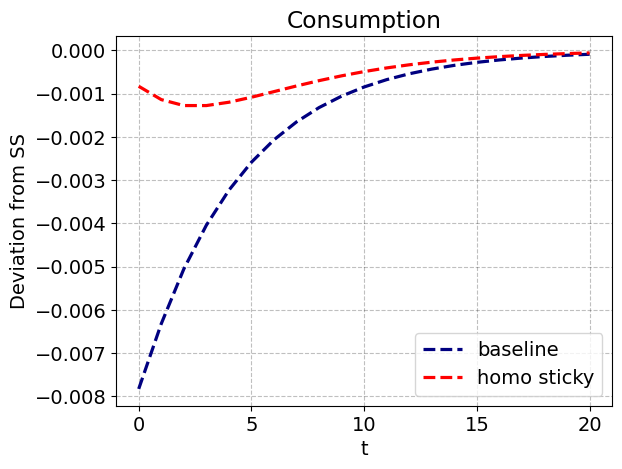

In [37]:
plt.plot(model_B.IRF['C_hh'][:21], label='baseline', linestyle='--', linewidth=2.3, color='navy')
plt.plot(model_sticky_B.IRF['C_hh'][:21], label='homo sticky', linestyle='--', linewidth=2.3, color='red')
plt.title('Consumption')
plt.ylabel("Deviation from SS")
plt.xlabel("t")
plt.legend()
plt.show()


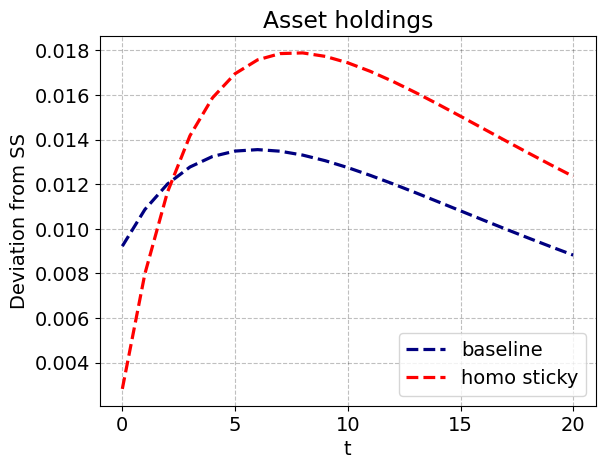

In [38]:

plt.plot(model_B.IRF['A_hh'][:21], label='baseline', linestyle='--', linewidth=2.3, color='navy')
plt.plot(model_sticky_B.IRF['A_hh'][:21], label='homo sticky', linestyle='--', linewidth=2.3, color='red')
plt.title('Asset holdings')
plt.ylabel("Deviation from SS")
plt.xlabel("t")
plt.legend()
plt.show()

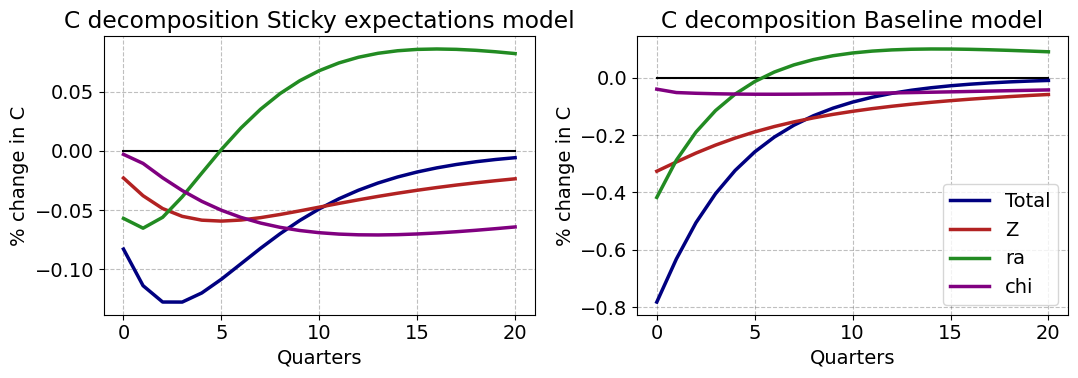

In [39]:
decomp(model_B,model_sticky_B, plot_test=False,modellabel='C decomposition Sticky expectations model',hetlabel='C decomposition Baseline model')

In [40]:
import numpy as np
import matplotlib.pyplot as plt


def plot_input_effect_on_C(
    model1,
    model2,
    model3=None,
    model4=None,
    model5=None,
    inp="ra",
    output="C_hh",
    T=40,
    label1="baseline",
    label2="sticky expectations",
    label3="hetero 1",
    label4="hetero 2",
    label5="hetero 3",
    title=None,
    scale="pct",                  # "pct" or "level"
    ls1="-",
    ls2="--",
    ls3="-.",
    ls4=":",
    ls5=(0, (3, 1, 1, 1)),         # dash-dot-dot
    color1="navy",
    color2="firebrick",
    color3="darkgreen",
    color4="purple",
    color5="darkorange",
    lw=2.6,
    figsize=(7.5, 4.5)
):
    """
    Plot contribution of a chosen input (ra, Z, chi, ...) to aggregate consumption:

        dC_from_inp(t) = J_{C,inp}[0:T,0:T] @ IRF_inp[0:T]

    Supports 2 to 5 models (model3..model5 optional).

    Returns
    -------
    tuple of arrays (d1, d2, ..., dk) with k = number of provided models.
    """

    def contrib(model, inp, output, T, scale):
        key = (output, inp)
        if model is None:
            return None
        if not hasattr(model, "jac_hh") or key not in model.jac_hh:
            raise KeyError(f"Missing Jacobian key {key} in model.jac_hh")
        if not hasattr(model, "IRF") or inp not in model.IRF:
            raise KeyError(f"Missing IRF path for '{inp}' in model.IRF")

        J = np.asarray(model.jac_hh[key])
        x = np.asarray(model.IRF[inp]).ravel()

        # pad/trim x to length T
        if x.size < T:
            x_pad = np.zeros(T)
            x_pad[:x.size] = x
            x = x_pad
        else:
            x = x[:T]

        # ensure Jacobian is at least TxT
        JT = J[:T, :T]
        d = JT @ x  # level contribution

        if scale == "pct":
            ssC = float(getattr(model.ss, output))
            d = 100.0 * d / ssC
        elif scale == "level":
            pass
        else:
            raise ValueError("scale must be 'pct' or 'level'")

        return d

    models = [model1, model2, model3, model4, model5]
    labels = [label1, label2, label3, label4, label5]
    colors = [color1, color2, color3, color4, color5]
    lss    = [ls1, ls2, ls3, ls4, ls5]

    # keep only provided models
    models_used, labels_used, colors_used, lss_used = [], [], [], []
    for m, lab, col, ls in zip(models, labels, colors, lss):
        if m is not None:
            models_used.append(m)
            labels_used.append(lab)
            colors_used.append(col)
            lss_used.append(ls)

    if len(models_used) < 2:
        raise ValueError("Provide at least model1 and model2 (2 models minimum).")

    # compute contributions
    ds = [contrib(m, inp, output, T, scale) for m in models_used]

    t = np.arange(T)

    # title
    if title is None:
        if scale == "pct":
            title = rf"Contribution of {inp} to $\%\Delta {output}$"
        else:
            title = f"Contribution of {inp} to {output} (levels)"

    # plot
    plt.figure(figsize=figsize)
    plt.axhline(0, color="black", lw=1)
    for d, lab, col, ls in zip(ds, labels_used, colors_used, lss_used):
        plt.plot(t, d, lw=lw, color=col, ls=ls, label=lab)

    plt.title(title)
    plt.xlabel("Quarters")
    plt.ylabel(r"Contribution to $\%\Delta C$" if scale == "pct" else "Contribution (level)")
    plt.grid(alpha=0.25)
    plt.legend()
    plt.tight_layout()
    plt.show()

    return tuple(ds)


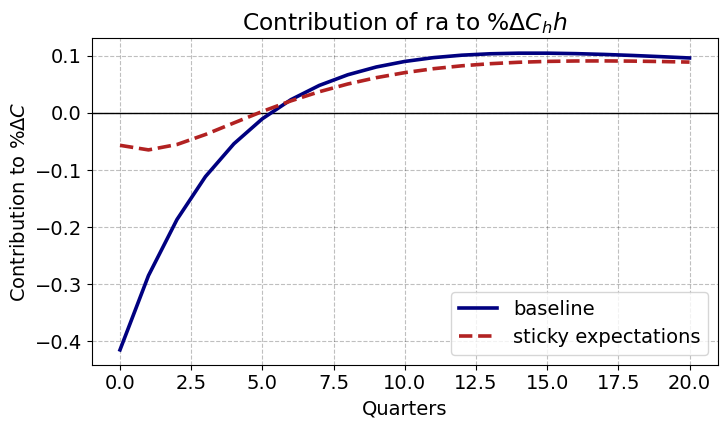

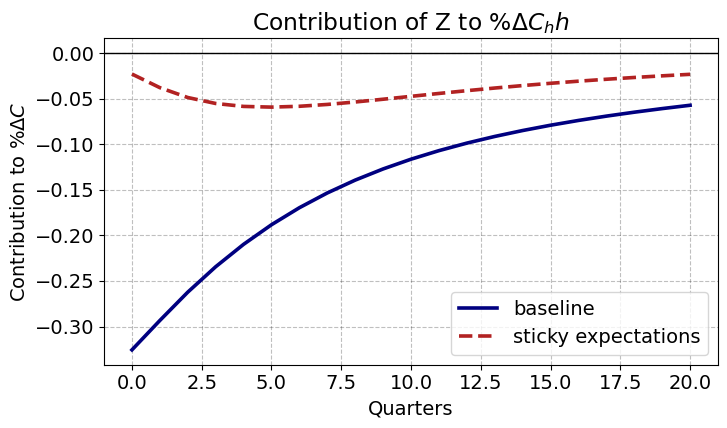

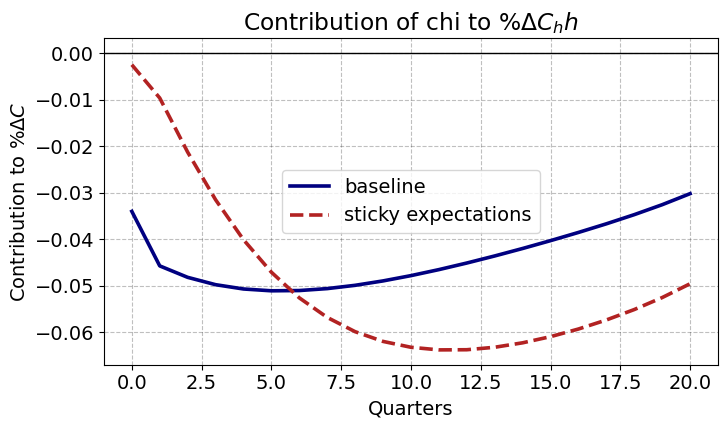

(array([-0.03399879, -0.04571548, -0.04817631, -0.0497529 , -0.05067973,
        -0.05106984, -0.05101433, -0.05059828, -0.04988956, -0.04894432,
        -0.04780769, -0.04651655, -0.04510036, -0.04358169, -0.0419758 ,
        -0.04029121, -0.03852784, -0.03667463, -0.0347045 , -0.03256504,
        -0.03019025]),
 array([-0.00248698, -0.00963446, -0.02126567, -0.03149472, -0.04008607,
        -0.04707395, -0.0525866 , -0.05678961, -0.05985525, -0.06194587,
        -0.06320743, -0.06376753, -0.06373564, -0.06320384, -0.06224759,
        -0.06092623, -0.0592824 , -0.05733976, -0.05509799, -0.05252216,
        -0.04955321]))

In [41]:
plot_input_effect_on_C(model_B, model_sticky_B, inp="ra",  T=21)
plot_input_effect_on_C(model_B, model_sticky_B, inp="Z",   T=21)
plot_input_effect_on_C(model_B, model_sticky_B, inp="chi", T=21)

In [42]:
df_mpc_sticky    = mpc_by_z_table(model_sticky_B)
df_chain_sticky, Chh_z= table_C_impact_by_z_from_perz_decomp(model_sticky_B, per_100bp=True)
df_contrib_sticky = contrib_to_agg_C_impact_by_z(df_chain_sticky)



   z    mass(z)  share_a0(z)   Abar(z)  MPC_quarterly(z)
0  0 0.00390625     0.933581 0.0354919          0.953795
1  1    0.03125     0.885457  0.069758          0.918142
2  2   0.109375     0.792603  0.145422          0.846089
3  3    0.21875     0.594011  0.321171          0.687638
4  4   0.273438     0.105274  0.744158          0.140365
5  5    0.21875   0.00972297   1.68755          0.048544
6  6   0.109375  0.000652834   3.27755         0.0324303
7  7    0.03125  3.62438e-05   5.58948         0.0258019
8  8 0.00390625  1.77266e-06   8.70863         0.0222015

Aggregate annual MPC (sum first 4 quarters of iMPC): 0.5000
[decomp] agg_mode auto-chosen: sum  max|diff|=2.42e-14
   z    mass(z)   %dC0_total  contrib_pp_to_agg_%dC0  rank_abs_contrib_pp
0  0 0.00390625  -0.00031475            -4.74278e-07                    9
1  1    0.03125  -0.00246748             -3.7745e-05                    7
2  2   0.109375  -0.00843153            -0.000574491                    5
3  3    0.21875   

[decomp] agg_mode auto-chosen: sum  max|diff|=2.07e-14
[decomp] max|agg(from z, policy-only) − IRF| = 2.07e-14
[decomp] residual range: [-2.067e-14, 1.778e-14]


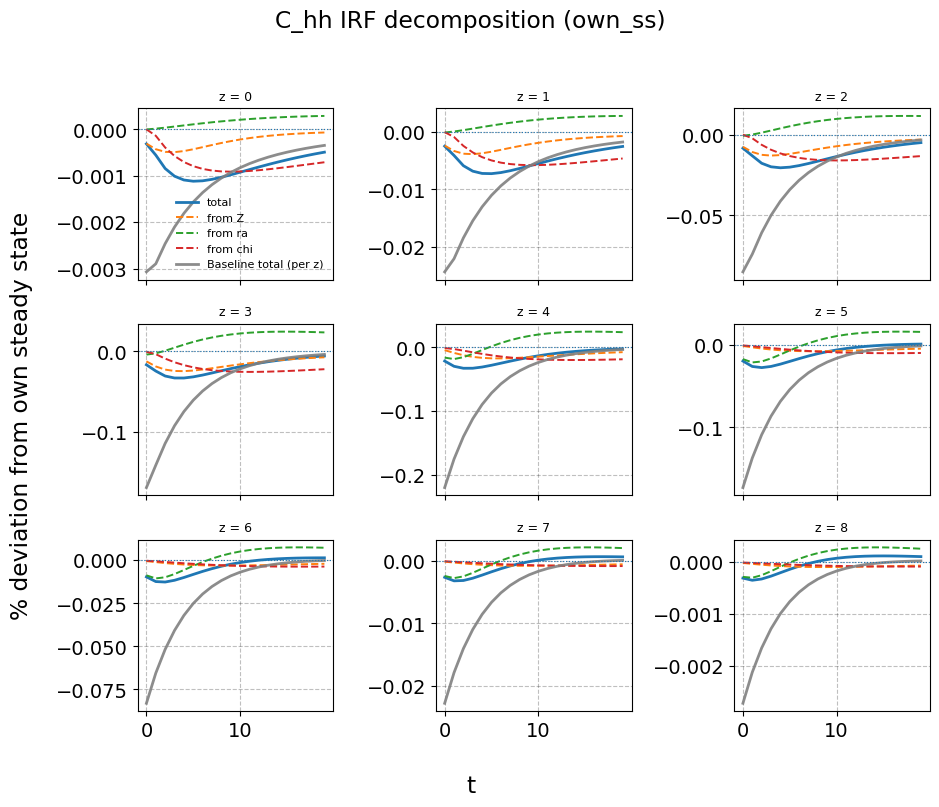

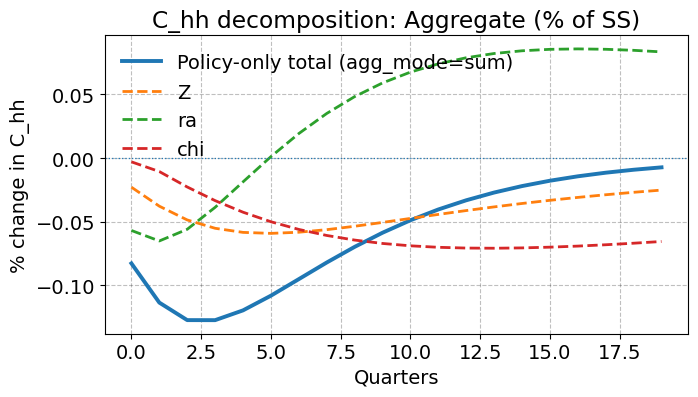

(array([[-1.21415286e-06, -2.14658448e-06, -3.26007128e-06,
         -3.89843812e-06, -4.21451017e-06, -4.31754897e-06,
         -4.28272107e-06, -4.16102949e-06, -3.98739339e-06,
         -3.78523880e-06, -3.56968304e-06, -3.35095061e-06,
         -3.13582105e-06, -2.92802170e-06, -2.72958800e-06,
         -2.54202417e-06, -2.36587499e-06, -2.20093123e-06,
         -2.04692135e-06, -1.90359018e-06],
        [-1.20784111e-05, -2.00327337e-05, -2.87745705e-05,
         -3.34372263e-05, -3.53743617e-05, -3.55520653e-05,
         -3.46304905e-05, -3.30544335e-05, -3.11228601e-05,
         -2.90324822e-05, -2.69063005e-05, -2.48220760e-05,
         -2.28305334e-05, -2.09557304e-05, -1.92064665e-05,
         -1.75873027e-05, -1.60967918e-05, -1.47285167e-05,
         -1.34746737e-05, -1.23279573e-05],
        [-5.25248567e-05, -8.19321357e-05, -1.10663063e-04,
         -1.24333846e-04, -1.28102084e-04, -1.25695025e-04,
         -1.19632424e-04, -1.11586137e-04, -1.02657209e-04,
         -9.

In [43]:
plot_by_z_with_input_decomp_norm(
    model=model_sticky_B,
    inputs=("Z", "ra","chi"),
    output="C_hh",
    T=20,
    norm_mode="own_ss",           # "none" | "own_ss" | "elasticity"
    shock_var=None,             # required for elasticity
    title_prefix=None,
    plot_aggregate=True,
    overlay_true_agg_irf=False,
    add_distribution_residual=False,
    agg_mode="auto",
    # --- NEW: baseline overlay ---
    overlay_baseline_total_by_z=True,
    baseline_model=model_B,
    baseline_label="Baseline total (per z)",
    common_yaxis=False
)

In [103]:
df_sticky, Cssz_sticky = table_C_impact_by_z_from_perz_decomp(model_sticky_B, T=300)
df = df_sticky.copy()
print(df)

df["rank_abs"] = df["%dC0_total"].abs().rank(ascending=False, method="dense").astype(int)

cols = ["z","mass(z)","%dC0_total","%dC0_total per 100bp ra","%dC0_from_ra","%dC0_from_Z","%dC0_from_chi","rank_abs"]
print(df[cols].to_latex(index=False, float_format="%.4f", caption="Impact consumption sensitivity by z", label="tab:impact_sensitivity_z"))

[decomp] agg_mode auto-chosen: sum  max|diff|=2.42e-14
   z   mass(z)   C_ss(z)  dC0_total  %dC0_total  %dC0_from_ra  %dC0_from_Z  \
0  0  0.003906  0.385751  -0.000001   -0.000315     -0.000004    -0.000309   
1  1  0.031250  0.489503  -0.000012   -0.002467     -0.000087    -0.002362   
2  2  0.109375  0.622957  -0.000053   -0.008432     -0.000768    -0.007559   
3  3  0.218750  0.793989  -0.000132   -0.016602     -0.003927    -0.012320   
4  4  0.273438  0.998181  -0.000214   -0.021460     -0.016097    -0.004354   
5  5  0.218750  1.193750  -0.000235   -0.019726     -0.017365    -0.001513   
6  6  0.109375  1.382294  -0.000134   -0.009719     -0.008828    -0.000552   
7  7  0.031250  1.573745  -0.000042   -0.002639     -0.002426    -0.000136   
8  8  0.003906  1.775123  -0.000005   -0.000308     -0.000285    -0.000016   

   %dC0_from_chi  %dC0_total per 100bp ra  rank_abs  
0      -0.000002                -0.001369         8  
1      -0.000019                -0.010730         7  
2 

HETEROGENEOUS STICKY MODEL

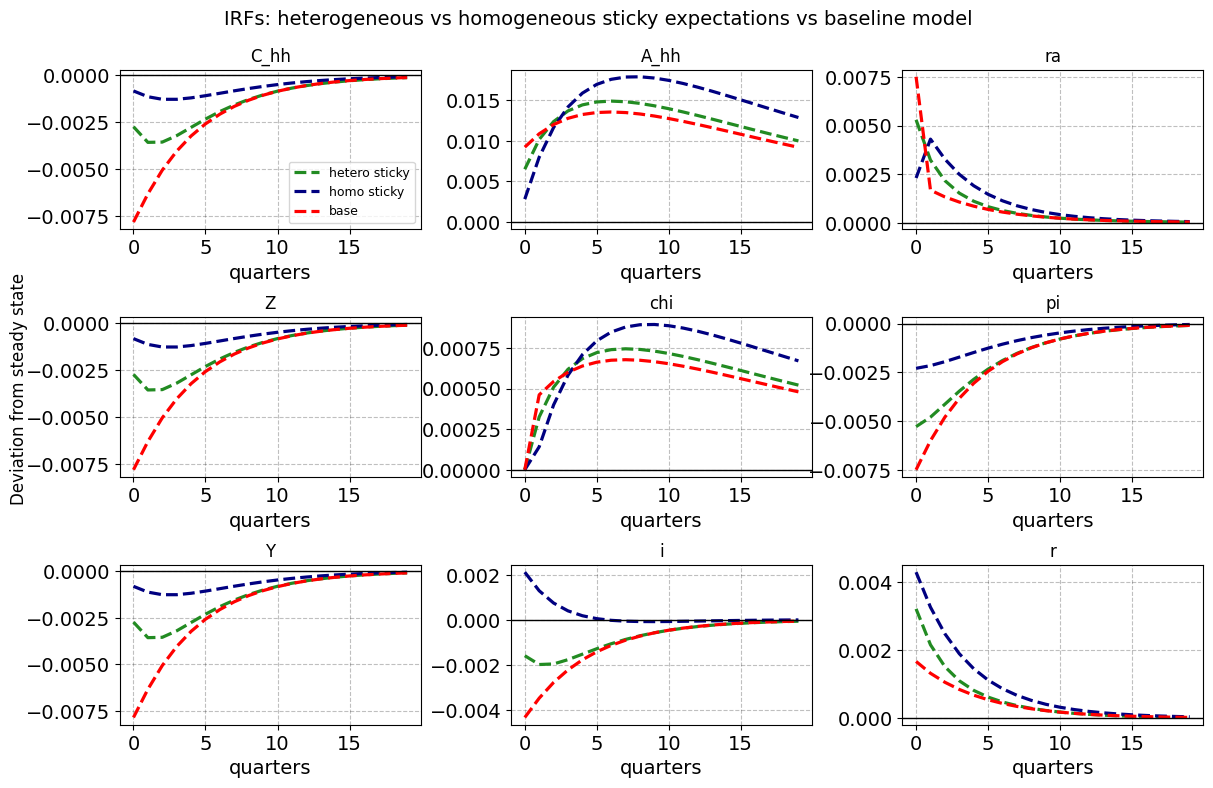

['C_hh', 'A_hh', 'ra', 'Z', 'chi', 'pi', 'Y', 'i', 'r']

In [44]:
plot_key_irfs_clean_two_models(
    model_hetero=model_B_het,
    model_homo=model_sticky_B,
    model_base=model_B,
    T=20,
    extra=("pi","Y","i","r"),
    title="IRFs: heterogeneous vs homogeneous sticky expectations vs baseline model",
    ylabel="Deviation from steady state",
    ncols=3,
    figsize_per_col=4.2,
    figsize_per_row=2.8,
    colors=("forestgreen", "navy", "red"),
    labels=("hetero sticky", "homo sticky", "base"),
    ls=("--", "--", "--"),
    force_union=True,   # if True: plot union of available vars across the two models
)

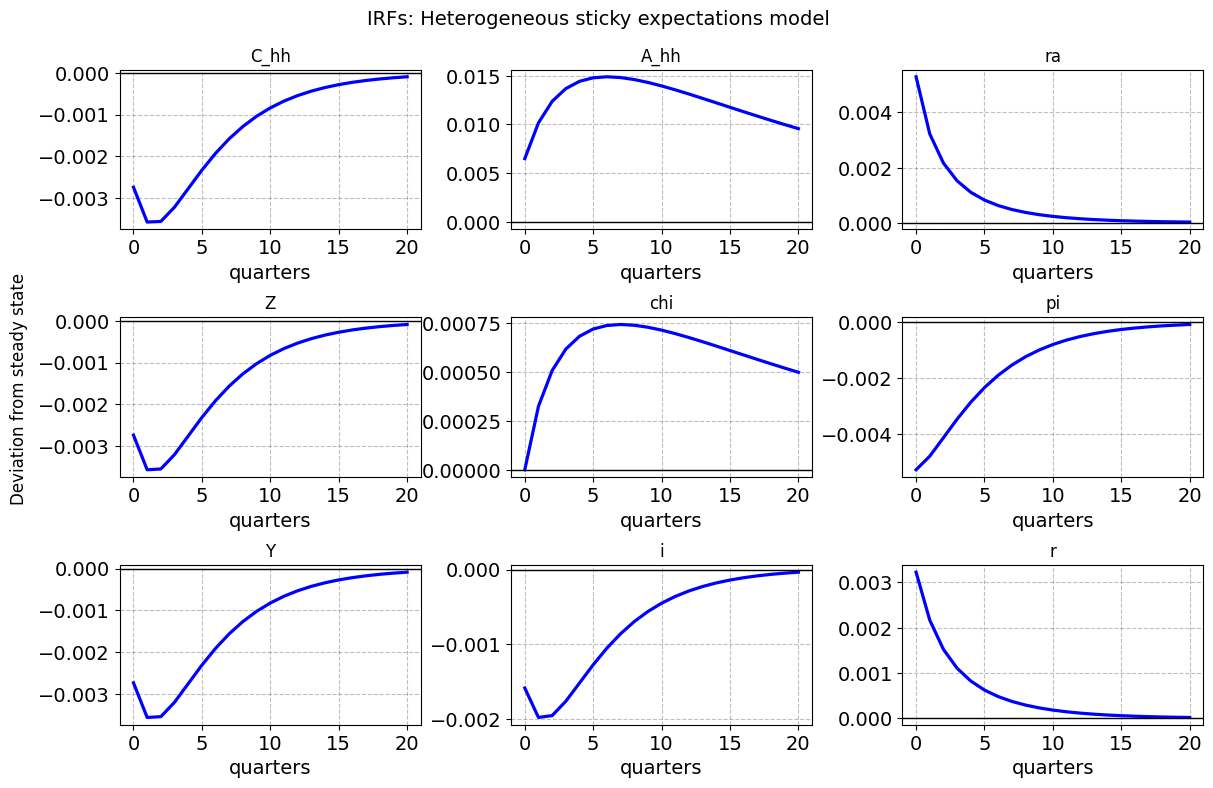

['C_hh', 'A_hh', 'ra', 'Z', 'chi', 'pi', 'Y', 'i', 'r']

In [107]:
plot_key_irfs_clean_up_to_three_models(model_B_het, T=21,
                                       labels=("heterogeneous sticky model"),
                                       title="IRFs: Heterogeneous sticky expectations model",
                                       colors="b")

[decomp] agg_mode auto-chosen: sum  max|diff|=4.69e-14
[decomp] max|agg(from z, policy-only) − IRF| = 4.69e-14
[decomp] residual range: [-4.691e-14, 3.903e-14]


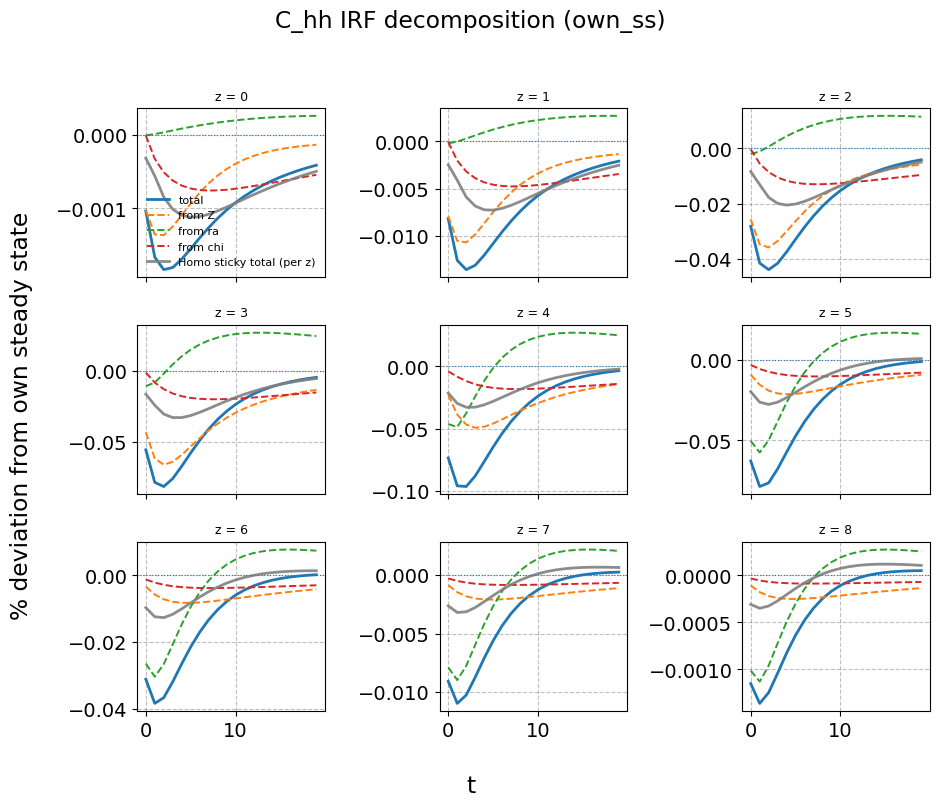

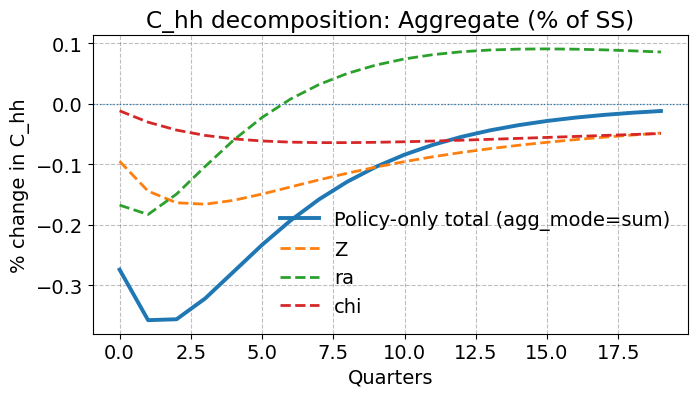

(array([[-3.99205836e-06, -6.41834643e-06, -7.07295292e-06,
         -6.96101894e-06, -6.52403720e-06, -5.97206032e-06,
         -5.40427347e-06, -4.86572153e-06, -4.37524249e-06,
         -3.93705135e-06, -3.54944995e-06, -3.20860072e-06,
         -2.90932074e-06, -2.64559401e-06, -2.41281283e-06,
         -2.20709871e-06, -2.02426647e-06, -1.86104137e-06,
         -1.71485932e-06, -1.58371174e-06],
        [-4.00589258e-05, -6.15035293e-05, -6.63428885e-05,
         -6.40651872e-05, -5.88924094e-05, -5.28227009e-05,
         -4.67859271e-05, -4.11919114e-05, -3.61919182e-05,
         -3.18083377e-05, -2.79989450e-05, -2.47101432e-05,
         -2.18785093e-05, -1.94331969e-05, -1.73182836e-05,
         -1.54864618e-05, -1.38936353e-05, -1.25025078e-05,
         -1.12827151e-05, -1.02106115e-05],
        [-1.75753315e-04, -2.58681431e-04, -2.73404874e-04,
         -2.59083457e-04, -2.33484391e-04, -2.04985158e-04,
         -1.77398061e-04, -1.52356827e-04, -1.30368252e-04,
         -1.

In [45]:
plot_by_z_with_input_decomp_norm(
    model=model_B_het,
    inputs=("Z", "ra","chi"),
    output="C_hh",
    T=20,
    norm_mode="own_ss",           # "none" | "own_ss" | "elasticity"
    shock_var=None,             # required for elasticity
    title_prefix=None,
    plot_aggregate=True,
    overlay_true_agg_irf=False,
    add_distribution_residual=False,
    agg_mode="auto",
    # --- NEW: baseline overlay ---
    overlay_baseline_total_by_z=True,
    baseline_model=model_sticky_B,
    baseline_label="Homo sticky total (per z)",
    common_yaxis=False
)

In [46]:
df_mpc_het    = mpc_by_z_table(model_B_het)
df_chain_het, Chh_z = table_C_impact_by_z_from_perz_decomp(model_B_het, per_100bp=True)
df_contrib_het = contrib_to_agg_C_impact_by_z(df_chain_het)


   z    mass(z)  share_a0(z)   Abar(z)  MPC_quarterly(z)
0  0 0.00390625     0.933581 0.0354919          0.953795
1  1    0.03125     0.885457  0.069758          0.918142
2  2   0.109375     0.792603  0.145422          0.846089
3  3    0.21875     0.594011  0.321171          0.687638
4  4   0.273438     0.105274  0.744158          0.140365
5  5    0.21875   0.00972297   1.68755          0.048544
6  6   0.109375  0.000652834   3.27755         0.0324303
7  7    0.03125  3.62438e-05   5.58948         0.0258019
8  8 0.00390625  1.77266e-06   8.70863         0.0222015

Aggregate annual MPC (sum first 4 quarters of iMPC): 0.5000
[decomp] agg_mode auto-chosen: sum  max|diff|=6.61e-14
   z    mass(z)  %dC0_total  contrib_pp_to_agg_%dC0  rank_abs_contrib_pp
0  0 0.00390625 -0.00103488             -1.5594e-06                    9
1  1    0.03125 -0.00818359            -0.000125184                    7
2  2   0.109375  -0.0282127              -0.0019223                    5
3  3    0.21875  -0.05

In [102]:
df_hetero, Cssz_other = table_C_impact_by_z_from_perz_decomp(model_B_het, T=300)
df = df_hetero.copy()
print(df)

df["rank_abs"] = df["%dC0_total"].abs().rank(ascending=False, method="dense").astype(int)

cols = ["z","mass(z)","%dC0_total","%dC0_total per 100bp ra","%dC0_from_ra","%dC0_from_Z","%dC0_from_chi","rank_abs"]
print(df[cols].to_latex(index=False, float_format="%.4f", caption="Impact consumption sensitivity by z", label="tab:impact_sensitivity_z"))

[decomp] agg_mode auto-chosen: sum  max|diff|=6.61e-14
   z   mass(z)   C_ss(z)  dC0_total  %dC0_total  %dC0_from_ra  %dC0_from_Z  \
0  0  0.003906  0.385751  -0.000004   -0.001035     -0.000003    -0.001027   
1  1  0.031250  0.489503  -0.000040   -0.008184     -0.000206    -0.007909   
2  2  0.109375  0.622957  -0.000176   -0.028213     -0.002100    -0.025706   
3  3  0.218750  0.793989  -0.000443   -0.055837     -0.011013    -0.043425   
4  4  0.273438  0.998181  -0.000732   -0.073360     -0.046312    -0.022967   
5  5  0.218750  1.193750  -0.000749   -0.062732     -0.050367    -0.009190   
6  6  0.109375  1.382294  -0.000431   -0.031147     -0.026458    -0.003418   
7  7  0.031250  1.573745  -0.000143   -0.009075     -0.007895    -0.000877   
8  8  0.003906  1.775123  -0.000020   -0.001152     -0.001013    -0.000107   

   %dC0_from_chi  %dC0_total per 100bp ra  rank_abs  
0      -0.000005                -0.001955         9  
1      -0.000069                -0.015459         7  
2 

CONTRAFACTUAL

In [47]:
df_gap, meta = table_gap_short_mid_total_3models(
    model_base=model_B,            # baseline FIRE model
    model_homo=model_sticky_B,     # homogeneous sticky expectations
    model_hetero=model_B_het,      # heterogeneous sticky expectations
    model_fire=model_B,            # FIRE benchmark jacobians
    output="C_hh",
    inputs=("Z","ra","chi"),
    T=40,
    full_window=(0, 20),
    split_t=6,                     # choose where “short” ends
    gap_metric="rel_to_scale_fire",
    percent_own_ss=True,
    rank_by="total",
)

print_gap_table_latex_compact(df_gap, meta, floatfmt="%.3f")

\begin{table}
\caption{Discounted |EQ−FIRE| gap by productivity state z (short: [0,6], mid: [7,20], total: [0,20]).}
\label{tab:eq_fire_gap_short_mid_total}
\begin{tabular}{rrrrrrrrrrrr}
\toprule
z & mass(z) & base_short & base_mid & base_total & homo_short & homo_mid & homo_total & hetero_short & hetero_mid & hetero_total & rank_abs \\
\midrule
0 & 0.004 & 0.000 & 0.000 & 0.000 & 0.817 & 3.101 & 3.645 & 0.315 & 0.781 & 1.026 & 9 \\
1 & 0.031 & 0.000 & 0.000 & 0.000 & 1.645 & 5.492 & 6.654 & 0.509 & 1.038 & 1.456 & 8 \\
2 & 0.109 & 0.000 & 0.000 & 0.000 & 2.064 & 5.650 & 7.216 & 0.829 & 1.361 & 2.070 & 2 \\
3 & 0.219 & 0.000 & 0.000 & 0.000 & 2.117 & 4.092 & 5.848 & 1.182 & 1.350 & 2.413 & 1 \\
4 & 0.273 & 0.000 & 0.000 & 0.000 & 2.183 & 1.128 & 3.212 & 1.272 & 0.598 & 1.817 & 3 \\
5 & 0.219 & 0.000 & 0.000 & 0.000 & 2.598 & 0.538 & 3.089 & 1.343 & 0.392 & 1.701 & 4 \\
6 & 0.109 & 0.000 & 0.000 & 0.000 & 2.704 & 0.443 & 3.107 & 1.353 & 0.324 & 1.648 & 5 \\
7 & 0.031 & 0.000 & 0.000 & 0

z   mass(z)  base_short  base_mid  base_total  homo_short  homo_mid  \
0  0  0.003906         0.0       0.0         0.0    0.817148  3.101140   
1  1  0.031250         0.0       0.0         0.0    1.645471  5.492183   
2  2  0.109375         0.0       0.0         0.0    2.063929  5.649879   
3  3  0.218750         0.0       0.0         0.0    2.116806  4.091870   
4  4  0.273438         0.0       0.0         0.0    2.182771  1.128219   
5  5  0.218750         0.0       0.0         0.0    2.597806  0.538294   
6  6  0.109375         0.0       0.0         0.0    2.703712  0.442613   
7  7  0.031250         0.0       0.0         0.0    2.758954  0.395826   
8  8  0.003906         0.0       0.0         0.0    2.795576  0.372873   

   homo_total  hetero_short  hetero_mid  hetero_total  rank_abs  
0    3.645283      0.314658    0.780556      1.026498         9  
1    6.654157      0.509431    1.038160      1.456198         8  
2    7.216428      0.829422    1.360754      2.070384         2  
3    5.848453      1.182087    1.349673      2.412943         1  
4    3.211669      1.272076    0.598043      1.817471         3  
5    3.088712      1.343328    0.392261      1.701057         4  
6    3.107360      1.352808    0.323675      1.647988         5  
7    3.119934      1.310072    0.273246      1.559263         6  
8    3.135623      1.261134    0.235850      1.476221         7

In [48]:
rot = rotate_gap_table_z_columns(
    df_gap,
    include_mass_row=True,
    float_format="%.3f",
    caption="Discounted |EQ−FIRE| gap by productivity state (z as columns).",
    label="tab:eq_fire_gap_zcols"
)


\begin{table}
\caption{Discounted |EQ−FIRE| gap by productivity state (z as columns).}
\label{tab:eq_fire_gap_zcols}
\begin{tabular}{lrrrrrrrrr}
\toprule
 & z=0 & z=1 & z=2 & z=3 & z=4 & z=5 & z=6 & z=7 & z=8 \\
\midrule
mass(z) & 0.004 & 0.031 & 0.109 & 0.219 & 0.273 & 0.219 & 0.109 & 0.031 & 0.004 \\
baseline: short & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 \\
baseline: mid & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 \\
baseline: total & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 \\
homo sticky: short & 0.817 & 1.645 & 2.064 & 2.117 & 2.183 & 2.598 & 2.704 & 2.759 & 2.796 \\
homo sticky: mid & 3.101 & 5.492 & 5.650 & 4.092 & 1.128 & 0.538 & 0.443 & 0.396 & 0.373 \\
homo sticky: total & 3.645 & 6.654 & 7.216 & 5.848 & 3.212 & 3.089 & 3.107 & 3.120 & 3.136 \\
hetero sticky: short & 0.315 & 0.509 & 0.829 & 1.182 & 1.272 & 1.343 & 1.353 & 1.310 & 1.261 \\
hetero sticky: mid & 0.781 & 1.038 & 1.361 & 1.35

APPENDIX

In [49]:
import numpy as np

# --- given ---
theta_vec_Z   = [0.818, 0.773, 0.75,  0.737, 0.722, 0.714, 0.706, 0.687, 0.667]
theta_vec_ra  = [0.818, 0.773, 0.75,  0.737, 0.722, 0.714, 0.706, 0.687, 0.667]
theta_vec_chi = [0.818, 0.773, 0.75,  0.737, 0.722, 0.714, 0.706, 0.687, 0.667]

T = 300

# --- 5 decay vectors: 0.51-0.59, 0.61-0.69, 0.71-0.79, 0.81-0.89, 0.91-0.99 ---
starts = [0.51, 0.61, 0.71, 0.81, 0.91]
decay_vectors = [np.round(np.linspace(s, s + 0.08, 9), 2) for s in starts]

E_by_z_sticky_list = []   # list of dicts (each dict has 'Z','ra','chi' -> list of T×T matrices)
E_by_z_sticky_dict = {}   # optional: keyed by start value for convenience

for s, decay_vec in zip(starts, decay_vectors):
    E_by_z = build_E_by_z_sticky(
        theta_vec_Z=theta_vec_Z,
        theta_vec_ra=theta_vec_ra,
        theta_vec_chi=theta_vec_chi,
        decay_vec_Z=decay_vec,
        decay_vec_ra=decay_vec,
        decay_vec_chi=decay_vec,
        T=T
    )
    E_by_z_sticky_list.append(E_by_z)
    E_by_z_sticky_dict[f"{s:.2f}-{s+0.08:.2f}"] = E_by_z

# Example: your original (0.91-0.99) is now
E_by_z_sticky_091_099 = E_by_z_sticky_dict["0.91-0.99"]

# Scalar sticky expectations matrix unchanged
# E_scalar = E_sticky_exp(0.935, T=model.par.T)

# quick sanity print
for k, v in E_by_z_sticky_dict.items():
    print(k, v["Z"][0].shape, decay_vectors[starts.index(float(k.split('-')[0]))])

0.51-0.59 (300, 300) [0.51 0.52 0.53 0.54 0.55 0.56 0.57 0.58 0.59]
0.61-0.69 (300, 300) [0.61 0.62 0.63 0.64 0.65 0.66 0.67 0.68 0.69]
0.71-0.79 (300, 300) [0.71 0.72 0.73 0.74 0.75 0.76 0.77 0.78 0.79]
0.81-0.89 (300, 300) [0.81 0.82 0.83 0.84 0.85 0.86 0.87 0.88 0.89]
0.91-0.99 (300, 300) [0.91 0.92 0.93 0.94 0.95 0.96 0.97 0.98 0.99]


In [50]:
model_B_het_1 = model_B_het.copy()

In [51]:
compute_jac_hh_z(model_B_het, dx=1e-4, do_print=True)

apply_heterogeneous_expectations_by_z(
    model_fire    = model_B,
    model_beliefs = model_B_het,
    E_by_z_sane   = E_by_z_sticky,
    sticky_vars   = ('Z','ra','chi'),
    outputs       = ('C_hh','A_hh'),
    overwrite_aggregate = True
)
model_B_het.compute_jacs(skip_hh=True, skip_shocks=False, do_print=False)
model_B_het.find_IRFs(shocks=['eps_i'], do_print=False)

computing per-z household Jacobians (direct method)...
finding Jacobian wrt. ghost          : 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251 252 253 

In [52]:
model_B_het_1.jac_hh.keys()

dict_keys([('A_hh', 'Z'), ('A_hh', 'chi'), ('A_hh', 'ra'), ('C_hh', 'Z'), ('C_hh', 'chi'), ('C_hh', 'ra')])

In [53]:
import copy
import numpy as np

# ------------------------------------------------------------
# 1) Build 5 decay vectors + corresponding E_by_z dictionaries
# ------------------------------------------------------------
starts = [0.51, 0.61, 0.71, 0.81, 0.91]
decay_vectors = [np.round(np.linspace(s, s + 0.08, 9), 2) for s in starts]

E_by_z_sticky_list = []   # list of 5 different E_by_z dictionaries
E_labels = []             # for bookkeeping / plotting labels later

for s, decay_vec in zip(starts, decay_vectors):
    E_by_z = build_E_by_z_sticky(
        theta_vec_Z=theta_vec_Z,
        theta_vec_ra=theta_vec_ra,
        theta_vec_chi=theta_vec_chi,
        decay_vec_Z=decay_vec,
        decay_vec_ra=decay_vec,
        decay_vec_chi=decay_vec,
        T=model_B.par.T  # use the model's horizon if available
    )
    E_by_z_sticky_list.append(E_by_z)
    E_labels.append(f"decay_{s:.2f}-{s+0.08:.2f}")

# ------------------------------------------------------------
# 2) Create 5 copies of model_B_het
# ------------------------------------------------------------
models_B_het = []
for i in range(5):
    m = copy.deepcopy(model_B_het)
    m.name = f"model_B_het_{i+1}"  # optional, if your class has .name
    models_B_het.append(m)

# ------------------------------------------------------------
# 3) (Optional but recommended) Copy FIRE per-z Jacobians once
#    so you never recompute compute_jac_hh_z in each model
# ------------------------------------------------------------
# If model_B already has jac_hh_z computed, reuse it:
if hasattr(model_B, "jac_hh_z"):
    for m in models_B_het:
        m.jac_hh_z = {k: v.copy() for k, v in model_B.jac_hh_z.items()}
        if hasattr(model_B, "jac_hh"):
            m.jac_hh = {k: v.copy() for k, v in model_B.jac_hh.items()}

# ------------------------------------------------------------
# 4) Apply heterogeneous expectations + solve GE IRFs for each
# ------------------------------------------------------------
for i, (m, E_by_z) in enumerate(zip(models_B_het, E_by_z_sticky_list), start=1):

    apply_heterogeneous_expectations_by_z(
        model_fire    = model_B,     # FIRE benchmark with per-z jacobians
        model_beliefs = m,           # the copy to overwrite with beliefs
        E_by_z_sane   = E_by_z,      # i-th expectations matrices
        sticky_vars   = ('Z','ra','chi'),
        outputs       = ('C_hh','A_hh'),
        overwrite_aggregate = True
    )

    # Recompute GE Jacobians and IRFs using modified household block
    m.compute_jacs(skip_hh=True, skip_shocks=False, do_print=False)
    m.find_IRFs(shocks=['eps_i'], do_print=False)

    print(f"[OK] Built {m.name if hasattr(m,'name') else f'model_B_het_{i}'} with {E_labels[i-1]}")

# Now you have:
#   models_B_het[0] == model_B_het_1  (decay 0.51-0.59)
#   ...
#   models_B_het[4] == model_B_het_5  (decay 0.91-0.99)
# and E_labels gives matching labels for plots/tables.


[OK] Built model_B_het_1 with decay_0.51-0.59
[OK] Built model_B_het_2 with decay_0.61-0.69
[OK] Built model_B_het_3 with decay_0.71-0.79
[OK] Built model_B_het_4 with decay_0.81-0.89
[OK] Built model_B_het_5 with decay_0.91-0.99


In [54]:
model_B_het_1, model_B_het_2, model_B_het_3, model_B_het_4, model_B_het_5 = models_B_het


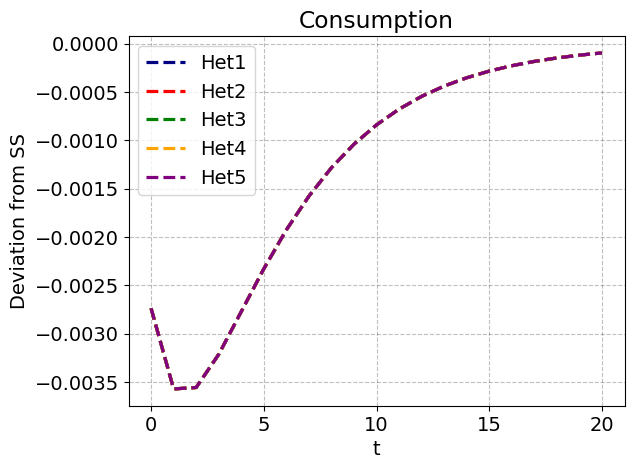

In [55]:
plt.plot(model_B_het_1.IRF['C_hh'][:21], label='Het1', linestyle='--', linewidth=2.3, color='navy')
plt.plot(model_B_het_2.IRF['C_hh'][:21], label='Het2', linestyle='--', linewidth=2.3, color='red')
plt.plot(model_B_het_3.IRF['C_hh'][:21], label='Het3', linestyle='--', linewidth=2.3, color='green')
plt.plot(model_B_het_4.IRF['C_hh'][:21], label='Het4', linestyle='--', linewidth=2.3, color='orange')
plt.plot(model_B_het_5.IRF['C_hh'][:21], label='Het5', linestyle='--', linewidth=2.3, color='purple')
plt.title('Consumption')
plt.ylabel("Deviation from SS")
plt.xlabel("t")
plt.legend()
plt.show()


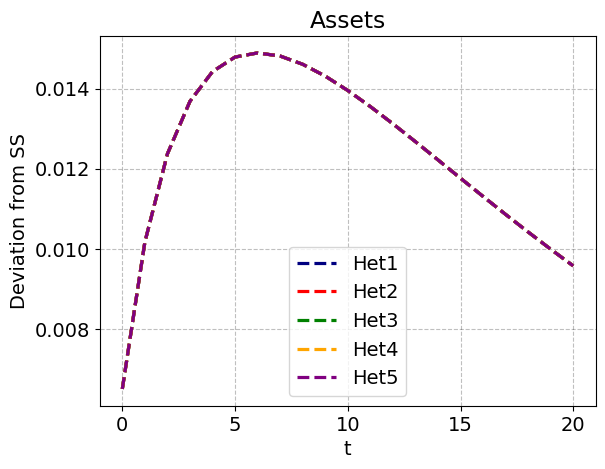

In [56]:
plt.plot(model_B_het_1.IRF['A_hh'][:21], label='Het1', linestyle='--', linewidth=2.3, color='navy')
plt.plot(model_B_het_2.IRF['A_hh'][:21], label='Het2', linestyle='--', linewidth=2.3, color='red')
plt.plot(model_B_het_3.IRF['A_hh'][:21], label='Het3', linestyle='--', linewidth=2.3, color='green')
plt.plot(model_B_het_4.IRF['A_hh'][:21], label='Het4', linestyle='--', linewidth=2.3, color='orange')
plt.plot(model_B_het_5.IRF['A_hh'][:21], label='Het5', linestyle='--', linewidth=2.3, color='purple')
plt.title('Assets')
plt.ylabel("Deviation from SS")
plt.xlabel("t")
plt.legend()
plt.show()


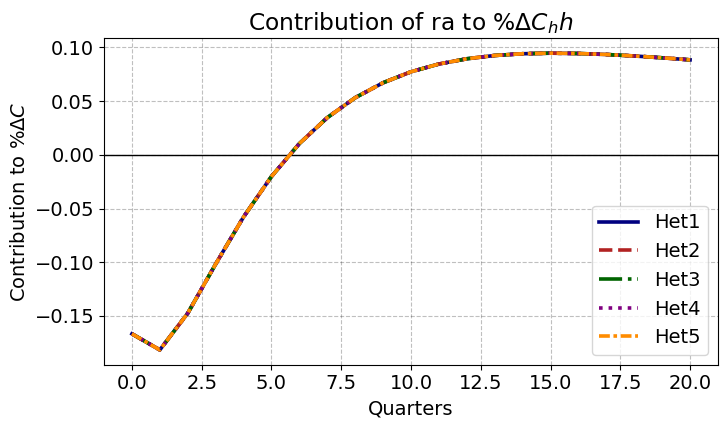

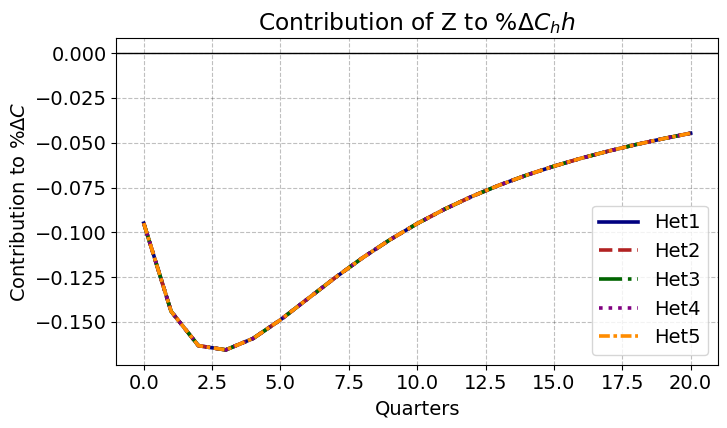

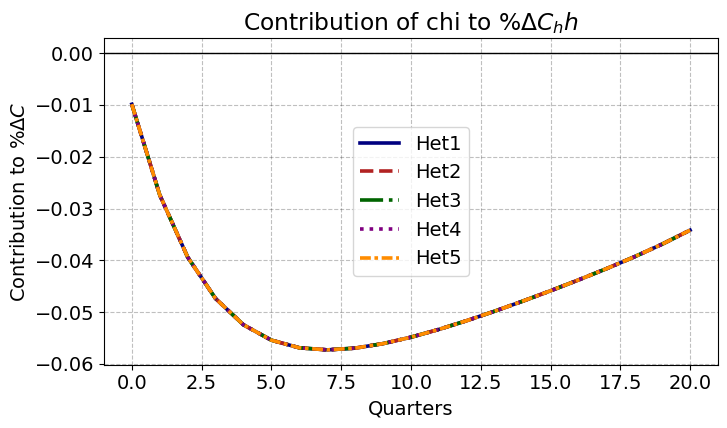

(array([-0.00986266, -0.02736851, -0.0393749 , -0.04737604, -0.05244845,
        -0.05541531, -0.05688255, -0.05728968, -0.05694895, -0.05608089,
        -0.05484048, -0.05333655, -0.05164506, -0.04981812, -0.04788962,
        -0.04587891, -0.04379166, -0.04161871, -0.03933186, -0.03687434,
        -0.03417429]),
 array([-0.00986266, -0.02736851, -0.0393749 , -0.04737604, -0.05244845,
        -0.05541531, -0.05688255, -0.05728968, -0.05694895, -0.05608089,
        -0.05484048, -0.05333655, -0.05164506, -0.04981812, -0.04788962,
        -0.04587891, -0.04379166, -0.04161871, -0.03933186, -0.03687434,
        -0.03417429]),
 array([-0.00986266, -0.02736851, -0.0393749 , -0.04737604, -0.05244845,
        -0.05541531, -0.05688255, -0.05728968, -0.05694895, -0.05608089,
        -0.05484048, -0.05333655, -0.05164506, -0.04981812, -0.04788962,
        -0.04587891, -0.04379166, -0.04161871, -0.03933186, -0.03687434,
        -0.03417429]),
 array([-0.00986266, -0.02736851, -0.0393749 , -0.04737

In [57]:
plot_input_effect_on_C(model_B_het_1, model_B_het_2,model_B_het_3,model_B_het_4,model_B_het_5, inp="ra",  T=21,label1="Het1", label2="Het2", label3="Het3", label4="Het4", label5="Het5")
plot_input_effect_on_C(model_B_het_1, model_B_het_2,model_B_het_3,model_B_het_4,model_B_het_5, inp="Z",  T=21,label1="Het1", label2="Het2", label3="Het3", label4="Het4", label5="Het5")
plot_input_effect_on_C(model_B_het_1, model_B_het_2,model_B_het_3,model_B_het_4,model_B_het_5, inp="chi", T=21,label1="Het1", label2="Het2", label3="Het3", label4="Het4", label5="Het5")

In [58]:
with open("other_notebook_bundle.pkl", "rb") as f:
    other = pickle.load(f)

other_models = other["models"]
Tplot = 21

In [93]:
with open("other_notebook_bundle.pkl", "rb") as f:
    other = pickle.load(f)

def wrap_exported_model_for_decomp(other_bundle, model_key):
    ob = other_bundle["models"][model_key]

    # rebuild jac_hh: keys are stored as "C_hh__ra"
    jac_hh = {}
    for kstr, J in ob["jac_hh"].items():
        if J is None:
            continue
        out, inp = kstr.split("__")
        jac_hh[(out, inp)] = np.asarray(J)

    # rebuild jac_hh_z: stored as "C_hh__ra" -> (Nz,T,T)
    jac_hh_z = {}
    for kstr, Jz in ob["jac_hh_z"].items():
        if Jz is None:
            continue
        out, inp = kstr.split("__")
        jac_hh_z[(out, inp)] = np.asarray(Jz)

    ss = SimpleNamespace(**ob["ss"])
    par = SimpleNamespace(**ob["par"])

    return SimpleNamespace(
        name=ob.get("name", model_key),
        IRF=ob["IRF"],
        jac_hh=jac_hh,
        jac_hh_z=jac_hh_z,
        ss=ss,
        par=par
    )

other_baseline_model = wrap_exported_model_for_decomp(other, "other_baseline")
other_sticky_model   = wrap_exported_model_for_decomp(other, "other_sticky")
other_hetero_model   = wrap_exported_model_for_decomp(other, "other_hetero")

In [83]:
import numpy as np
import matplotlib.pyplot as plt

def plot_key_irfs_clean_up_to_three_models(
    model1,
    model2=None,
    model3=None,
    T=40,
    extra=("pi","Y","i","r"),
    title="IRFs",
    ylabel="Deviation from steady state",
    ncols=3,
    figsize_per_col=4.2,
    figsize_per_row=2.8,
    colors=("forestgreen", "navy", "red"),
    labels=("model 1", "model 2", "model 3"),
    ls=("-", "--", "-."),
    force_union=True,   # union of available vars across provided models
):
    """
    Plot key IRFs for 1, 2, or 3 models (overlayed in each subplot).

    Parameters
    ----------
    model1 : required, must have .IRF dict
    model2, model3 : optional, can be None
    force_union : if True, plot variables available in ANY provided model
                  if False, plot only variables available in ALL provided models
    """

    wanted = ["C_hh","A_hh","ra","Z","chi"] + list(extra)

    models = [m for m in (model1, model2, model3) if m is not None]
    if len(models) == 0:
        raise ValueError("At least one model must be provided.")

    # clip styles to number of models
    colors = list(colors)[:len(models)]
    labels = list(labels)[:len(models)]
    ls     = list(ls)[:len(models)]

    def _avail(m):
        out = []
        if not hasattr(m, "IRF"):
            return out
        for v in wanted:
            if v in m.IRF:
                arr = np.asarray(m.IRF[v])
                if np.any(np.isfinite(arr)):
                    out.append(v)
        return out

    avails = [set(_avail(m)) for m in models]

    if force_union:
        available = [v for v in wanted if any(v in a for a in avails)]
    else:
        available = [v for v in wanted if all(v in a for a in avails)]

    if len(available) == 0:
        raise RuntimeError("No requested IRF series found in provided model.IRF dicts.")

    n = len(available)
    nrows = int(np.ceil(n / ncols))

    fig, axes = plt.subplots(
        nrows, ncols,
        figsize=(figsize_per_col * ncols, figsize_per_row * nrows),
        squeeze=False
    )

    # ---- margins ----
    left, right, bottom, top = 0.12, 0.98, 0.10, 0.88
    wspace, hspace = 0.30, 0.55
    fig.subplots_adjust(left=left, right=right, bottom=bottom, top=top,
                        wspace=wspace, hspace=hspace)

    fig.text(0.5, 0.94, title, ha="center", va="center", fontsize=14)
    fig.text(0.04, 0.5, ylabel, ha="center", va="center", rotation="vertical", fontsize=12)

    def _get_series(m, var):
        if (not hasattr(m, "IRF")) or (var not in m.IRF):
            return None
        s = np.asarray(m.IRF[var]).ravel()
        if s.size == 0 or not np.any(np.isfinite(s)):
            return None
        return s[:T]

    # plot panels
    for idx, var in enumerate(available):
        r = idx // ncols
        c = idx % ncols
        ax = axes[r, c]

        series_list = [_get_series(m, var) for m in models]

        # plot each provided model if series exists
        for j, s in enumerate(series_list):
            if s is None:
                continue
            ax.plot(np.arange(s.size), s, lw=2.3, color=colors[j], ls=ls[j], label=labels[j])

        ax.axhline(0, color="black", lw=1)
        ax.set_title(var, fontsize=12)
        ax.set_xlabel("quarters")
        ax.grid(alpha=0.25)
        ax.set_ylabel("")

        # legend only once (first panel)
        if idx == 0 and len(models) > 1:
            ax.legend(frameon=True, fontsize=9)

    # turn off unused axes
    for idx in range(n, nrows * ncols):
        r = idx // ncols
        c = idx % ncols
        axes[r, c].axis("off")

    plt.show()
    return available

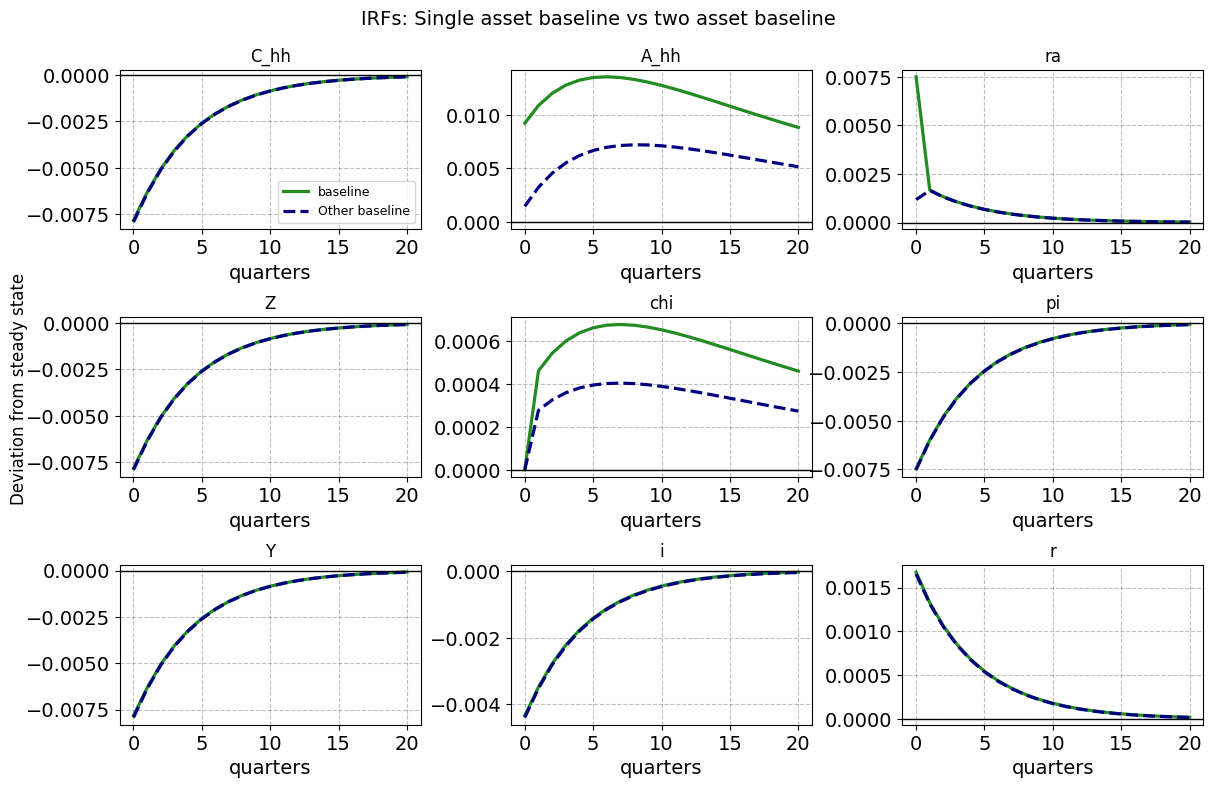

['C_hh', 'A_hh', 'ra', 'Z', 'chi', 'pi', 'Y', 'i', 'r']

In [ ]:
plot_key_irfs_clean_up_to_three_models(model_B, other_baseline_model, T=21,
                                       labels=("baseline","Other baseline"),
                                       title="IRFs: Single asset baseline vs two asset baseline")

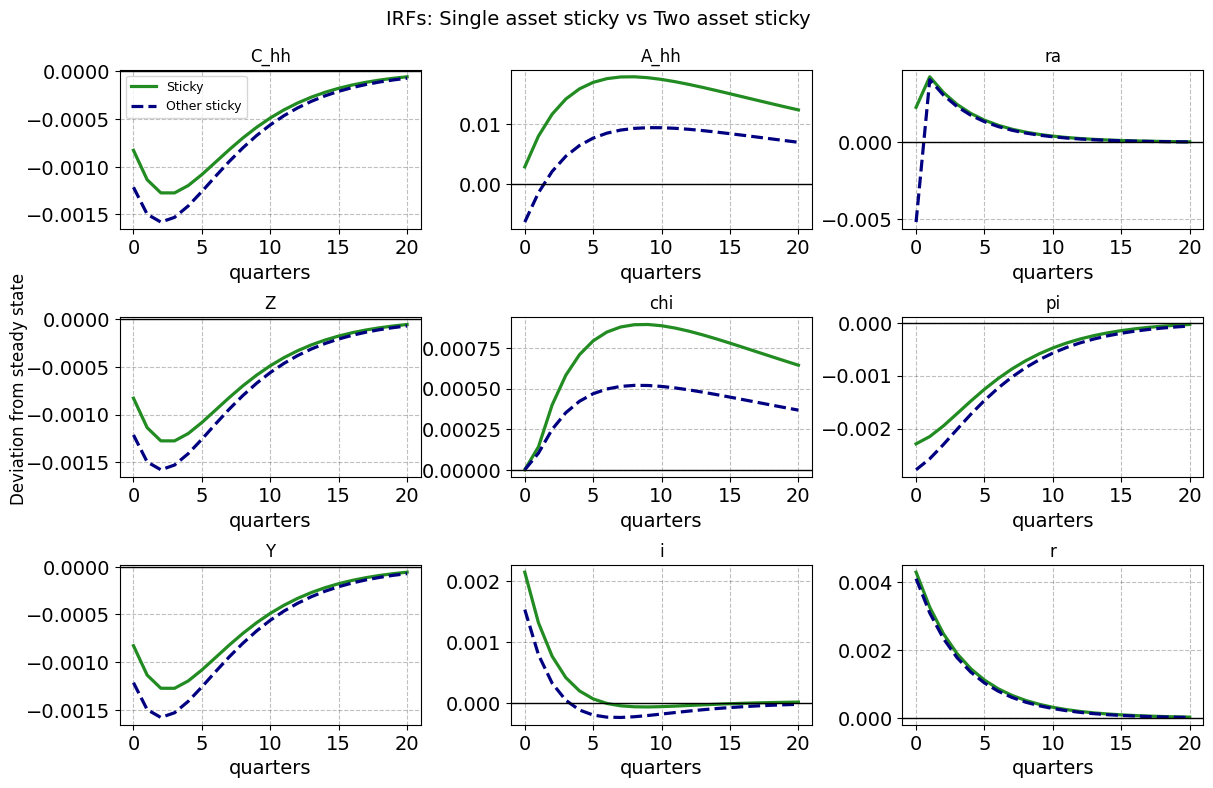

['C_hh', 'A_hh', 'ra', 'Z', 'chi', 'pi', 'Y', 'i', 'r']

In [85]:
plot_key_irfs_clean_up_to_three_models(model_sticky_B, other_sticky_model, T=Tplot,
                                       labels=("Sticky","Other sticky"),
                                       title="IRFs: Single asset sticky vs Two asset sticky")

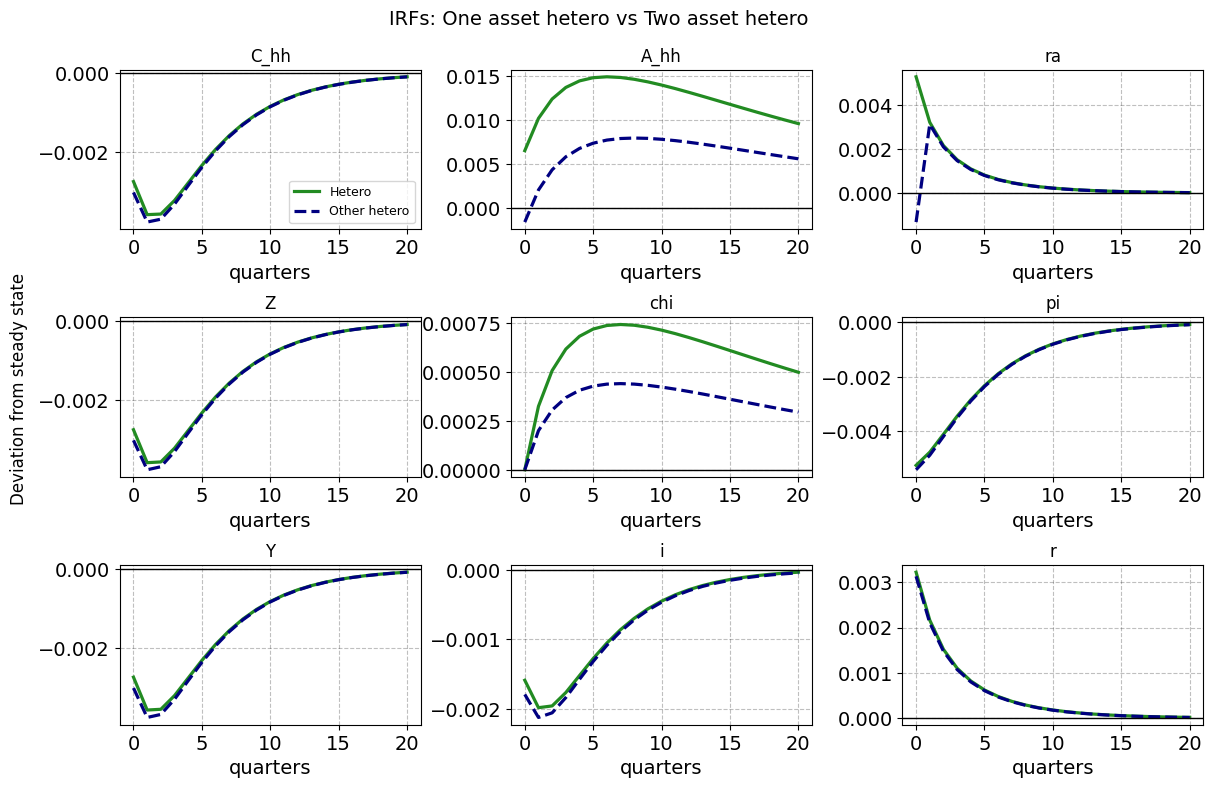

['C_hh', 'A_hh', 'ra', 'Z', 'chi', 'pi', 'Y', 'i', 'r']

In [ ]:
plot_key_irfs_clean_up_to_three_models(model_B_het, other_hetero_model, T=21,
                                       labels=("Hetero","Other hetero"),
                                       title="IRFs: One asset hetero vs Two asset hetero")

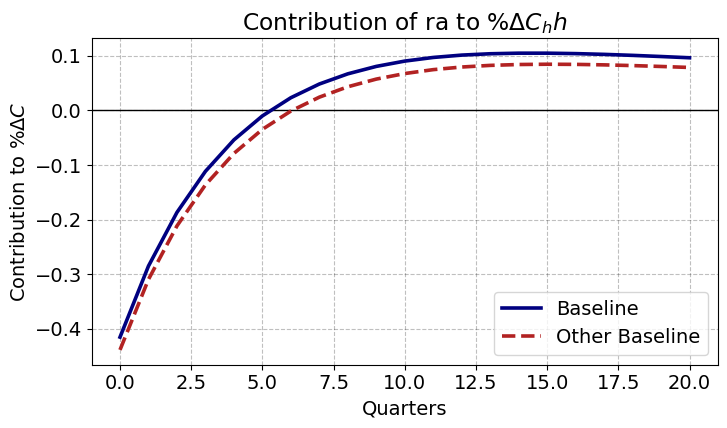

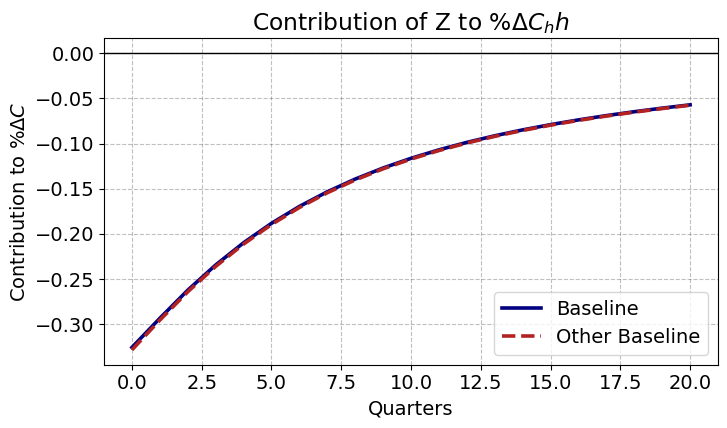

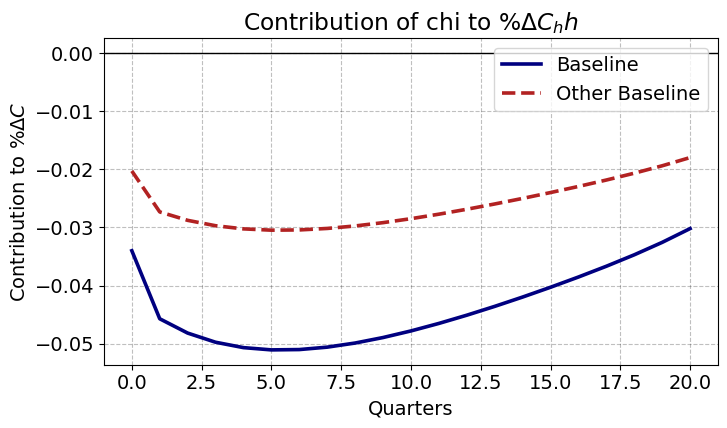

(array([-0.03399879, -0.04571548, -0.04817631, -0.0497529 , -0.05067973,
        -0.05106984, -0.05101433, -0.05059828, -0.04988956, -0.04894432,
        -0.04780769, -0.04651655, -0.04510036, -0.04358169, -0.0419758 ,
        -0.04029121, -0.03852784, -0.03667463, -0.0347045 , -0.03256504,
        -0.03019025]),
 array([-0.02027664, -0.02732358, -0.02877176, -0.02970041, -0.03024258,
        -0.03046565, -0.03042407, -0.03016856, -0.02973951, -0.02917032,
        -0.02848783, -0.02771393, -0.02686613, -0.02595781, -0.02499805,
        -0.02399189, -0.02293928, -0.02183362, -0.02065879, -0.01938366,
        -0.0179684 ]))

In [87]:
plot_input_effect_on_C(model_B, other_baseline_model, label1="Baseline", label2="Other Baseline", inp="ra",  T=21)
plot_input_effect_on_C(model_B, other_baseline_model, label1="Baseline", label2="Other Baseline", inp="Z",   T=21)
plot_input_effect_on_C(model_B,other_baseline_model, label1="Baseline", label2="Other Baseline", inp="chi", T=21)

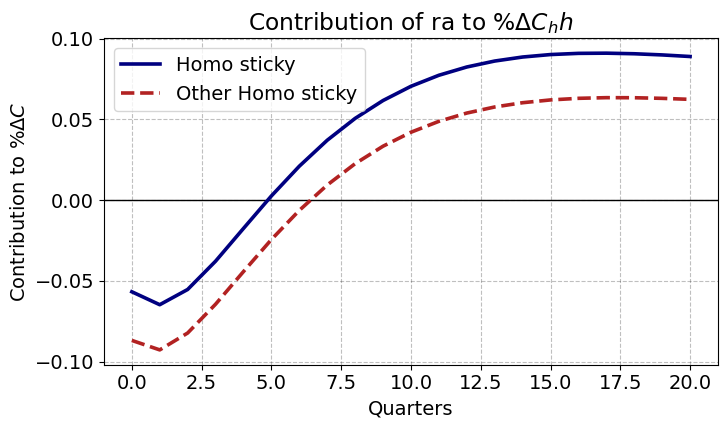

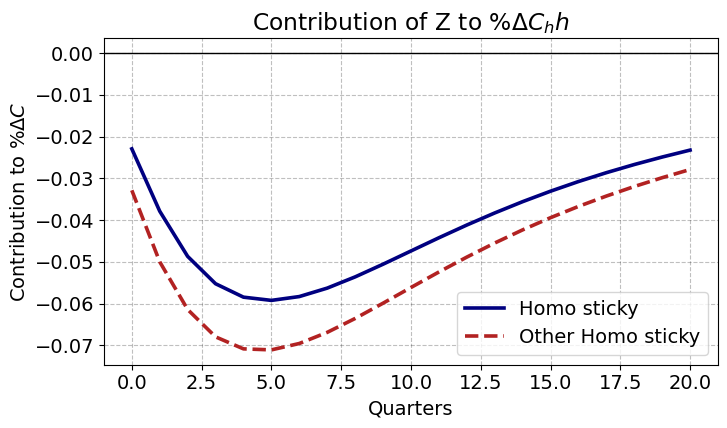

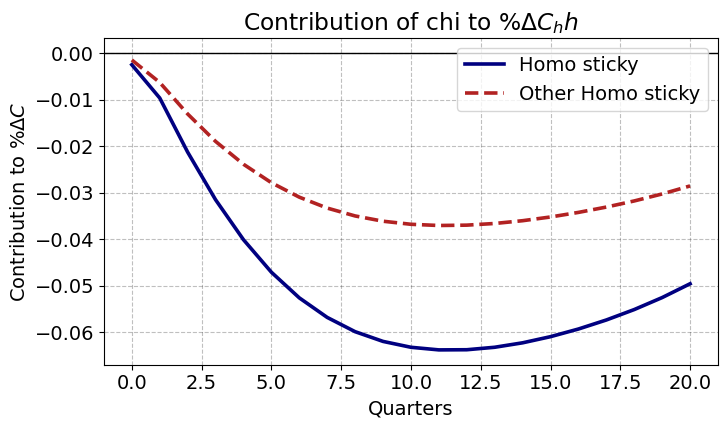

(array([-0.00248698, -0.00963446, -0.02126567, -0.03149472, -0.04008607,
        -0.04707395, -0.0525866 , -0.05678961, -0.05985525, -0.06194587,
        -0.06320743, -0.06376753, -0.06373564, -0.06320384, -0.06224759,
        -0.06092623, -0.0592824 , -0.05733976, -0.05509799, -0.05252216,
        -0.04955321]),
 array([-0.00146366, -0.00629355, -0.01306591, -0.01895846, -0.02387091,
        -0.02783825, -0.03094442, -0.03329162, -0.03498334, -0.03611581,
        -0.03677478, -0.03703472, -0.03695921, -0.03660146, -0.03600492,
        -0.03520368, -0.03422214, -0.03307378, -0.03175835, -0.03025583,
        -0.02853184]))

In [88]:
plot_input_effect_on_C(model_sticky_B, other_sticky_model, label1="Homo sticky", label2="Other Homo sticky",inp="ra",  T=21)
plot_input_effect_on_C(model_sticky_B, other_sticky_model, label1="Homo sticky", label2="Other Homo sticky",inp="Z",   T=21)
plot_input_effect_on_C(model_sticky_B, other_sticky_model, label1="Homo sticky", label2="Other Homo sticky",inp="chi", T=21)

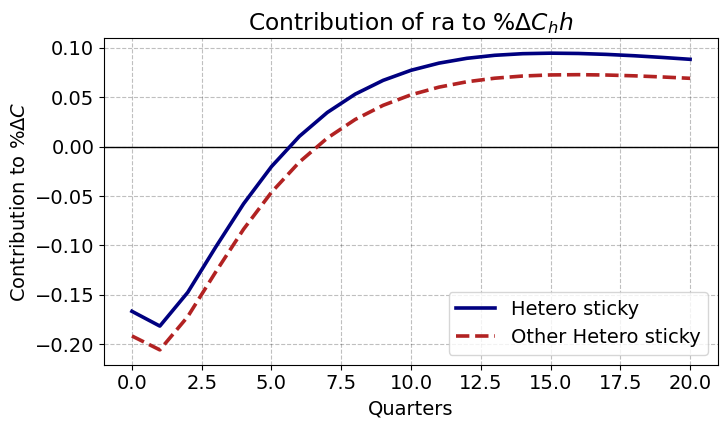

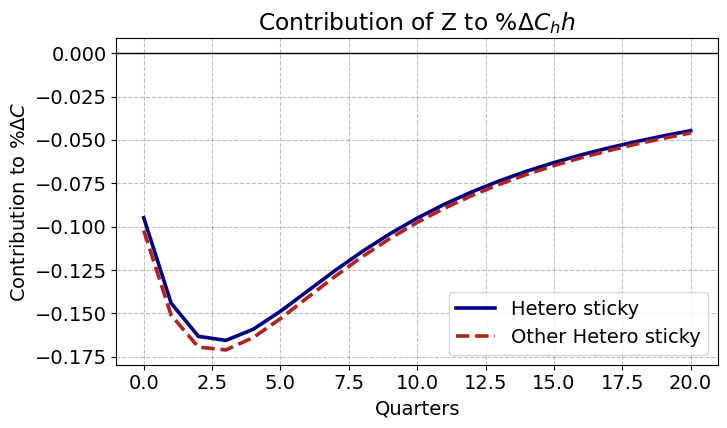

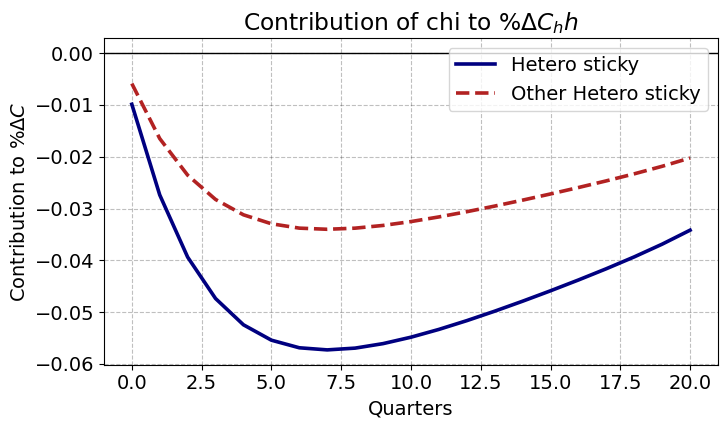

(array([-0.00986266, -0.02736851, -0.0393749 , -0.04737604, -0.05244845,
        -0.05541531, -0.05688255, -0.05728968, -0.05694895, -0.05608089,
        -0.05484048, -0.05333655, -0.05164506, -0.04981812, -0.04788962,
        -0.04587891, -0.04379166, -0.04161871, -0.03933186, -0.03687434,
        -0.03417429]),
 array([-0.00586839, -0.01648923, -0.0235539 , -0.02824664, -0.03121206,
        -0.03293798, -0.03378231, -0.03400419, -0.03378729, -0.03326124,
        -0.03251704, -0.03161858, -0.03061042, -0.02952311, -0.02837651,
        -0.02718193, -0.02594264, -0.02465316, -0.02329677, -0.02183988,
        -0.02023937]))

In [89]:
plot_input_effect_on_C(model_B_het, other_hetero_model, label1="Hetero sticky", label2="Other Hetero sticky",inp="ra",  T=21)
plot_input_effect_on_C(model_B_het, other_hetero_model, label1="Hetero sticky", label2="Other Hetero sticky",inp="Z",   T=21)
plot_input_effect_on_C(model_B_het, other_hetero_model, label1="Hetero sticky", label2="Other Hetero sticky",inp="chi", T=21)

In [94]:
df_other_base, Cssz_other = table_C_impact_by_z_from_perz_decomp(other_baseline_model, T=300)

[decomp] agg_mode auto-chosen: sum  max|diff|=1.73e-07


In [98]:
df = df_other_base.copy()
print(df)

df["rank_abs"] = df["%dC0_total"].abs().rank(ascending=False, method="dense").astype(int)

cols = ["z","mass(z)","%dC0_total","%dC0_total per 100bp ra","%dC0_from_ra","%dC0_from_Z","%dC0_from_chi","rank_abs"]
print(df[cols].to_latex(index=False, float_format="%.4f", caption="Impact consumption sensitivity by z", label="tab:impact_sensitivity_z"))

   z   mass(z)   C_ss(z)  dC0_total  %dC0_total  %dC0_from_ra  %dC0_from_Z  \
0  0  0.003906  0.387270  -0.000012   -0.003104     -0.000085    -0.003003   
1  1  0.031250  0.490772  -0.000121   -0.024728     -0.001206    -0.023336   
2  2  0.109375  0.623904  -0.000538   -0.086266     -0.008127    -0.077158   
3  3  0.218750  0.794521  -0.001371   -0.172545     -0.034185    -0.135204   
4  4  0.273438  0.998231  -0.002201   -0.220480     -0.119261    -0.092618   
5  5  0.218750  1.193280  -0.002079   -0.174208     -0.131374    -0.036625   
6  6  0.109375  1.381248  -0.001176   -0.085143     -0.069389    -0.013351   
7  7  0.031250  1.572067  -0.000373   -0.023749     -0.019932    -0.003281   
8  8  0.003906  1.772749  -0.000051   -0.002897     -0.002460    -0.000383   

   %dC0_from_chi  %dC0_total per 100bp ra  rank_abs  
0      -0.000016                -0.026299         8  
1      -0.000186                -0.209533         6  
2      -0.000981                -0.730974         4  
3  

In [99]:
df_other_sticky, Cssz_other = table_C_impact_by_z_from_perz_decomp(other_sticky_model, T=300)
df = df_other_sticky.copy()
print(df)

df["rank_abs"] = df["%dC0_total"].abs().rank(ascending=False, method="dense").astype(int)

cols = ["z","mass(z)","%dC0_total","%dC0_total per 100bp ra","%dC0_from_ra","%dC0_from_Z","%dC0_from_chi","rank_abs"]
print(df[cols].to_latex(index=False, float_format="%.4f", caption="Impact consumption sensitivity by z", label="tab:impact_sensitivity_z"))

[decomp] agg_mode auto-chosen: sum  max|diff|=2.46e-14
   z   mass(z)   C_ss(z)  dC0_total  %dC0_total  %dC0_from_ra  %dC0_from_Z  \
0  0  0.003906  0.387270  -0.000002   -0.000487     -0.000036    -0.000450   
1  1  0.031250  0.490772  -0.000019   -0.003895     -0.000440    -0.003444   
2  2  0.109375  0.623904  -0.000085   -0.013557     -0.002473    -0.011022   
3  3  0.218750  0.794521  -0.000211   -0.026614     -0.008469    -0.017934   
4  4  0.273438  0.998231  -0.000296   -0.029655     -0.022979    -0.006080   
5  5  0.218750  1.193280  -0.000324   -0.027130     -0.024593    -0.002044   
6  6  0.109375  1.381248  -0.000200   -0.014506     -0.013566    -0.000745   
7  7  0.031250  1.572067  -0.000069   -0.004370     -0.004142    -0.000184   
8  8  0.003906  1.772749  -0.000010   -0.000574     -0.000547    -0.000022   

   %dC0_from_chi  %dC0_total per 100bp ra  rank_abs  
0  -9.901360e-07                 0.000935         9  
1  -1.147875e-05                 0.007476         7  
2 

In [100]:
df_other_hetero, Cssz_other = table_C_impact_by_z_from_perz_decomp(other_hetero_model, T=300)
df = df_other_hetero.copy()
print(df)

df["rank_abs"] = df["%dC0_total"].abs().rank(ascending=False, method="dense").astype(int)

cols = ["z","mass(z)","%dC0_total","%dC0_total per 100bp ra","%dC0_from_ra","%dC0_from_Z","%dC0_from_chi","rank_abs"]
print(df[cols].to_latex(index=False, float_format="%.4f", caption="Impact consumption sensitivity by z", label="tab:impact_sensitivity_z"))

[decomp] agg_mode auto-chosen: sum  max|diff|=4.60e-14
   z   mass(z)   C_ss(z)  dC0_total  %dC0_total  %dC0_from_ra  %dC0_from_Z  \
0  0  0.003906  0.387270  -0.000004   -0.001156     -0.000032    -0.001122   
1  1  0.031250  0.490772  -0.000045   -0.009202     -0.000514    -0.008647   
2  2  0.109375  0.623904  -0.000199   -0.031916     -0.003574    -0.028099   
3  3  0.218750  0.794521  -0.000501   -0.063099     -0.014884    -0.047381   
4  4  0.273438  0.998231  -0.000786   -0.078713     -0.051901    -0.024381   
5  5  0.218750  1.193280  -0.000809   -0.067808     -0.056289    -0.009637   
6  6  0.109375  1.381248  -0.000480   -0.034720     -0.030386    -0.003582   
7  7  0.031250  1.572067  -0.000164   -0.010417     -0.009319    -0.000919   
8  8  0.003906  1.772749  -0.000024   -0.001363     -0.001232    -0.000112   

   %dC0_from_chi  %dC0_total per 100bp ra  rank_abs  
0      -0.000003                 0.008805         9  
1      -0.000041                 0.070078         7  
2 

ALT EXPECTATION VECTOR

In [70]:
theta_vec_Z  = [0.956, 0.945, 0.940, 0.937, 0.933, 0.931, 0.929, 0.925, 0.920]
theta_vec_ra = [0.956, 0.945, 0.940, 0.937, 0.933, 0.931, 0.929, 0.925, 0.920]
theta_vec_chi = [0.956, 0.945, 0.940, 0.937, 0.933, 0.931, 0.929, 0.925, 0.920]

decay_vec_Z = np.array([0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99])
decay_vec_ra = np.array([0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99])
decay_vec_chi = np.array([0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99])

E_by_z_sticky_test = build_E_by_z_sticky(theta_vec_Z=theta_vec_Z, theta_vec_ra=theta_vec_ra, theta_vec_chi=theta_vec_chi,
                                    decay_vec_Z=decay_vec_Z, decay_vec_ra=decay_vec_ra, decay_vec_chi=decay_vec_chi, T=300)

E_scalar = E_sticky_exp(0.935, T=model.par.T)

In [71]:
model_B_thetatest = copy.deepcopy(model_B)
model_B_thetatest.name = getattr(model_B, "name", "model_B") + "_copy"

# sanity checks
assert hasattr(model_B_thetatest, "jac_hh_z"), "Copy is missing jac_hh_z"
assert all(k in model_B_thetatest.jac_hh_z for k in model_B.jac_hh_z.keys()), "jac_hh_z keys mismatch"

print("Created model_B_thetatest with jac_hh_z.")
print("Example jac shape:", next(iter(model_B_thetatest.jac_hh_z.values())).shape)

Created model_B_thetatest with jac_hh_z.
Example jac shape: (9, 300, 300)


In [72]:
apply_heterogeneous_expectations_by_z(
    model_fire    = model_B,
    model_beliefs = model_B_thetatest,
    E_by_z_sane   = E_by_z_sticky_test,
    sticky_vars   = ('Z','ra','chi'),
    outputs       = ('C_hh','A_hh'),
    overwrite_aggregate = True
)
model_B_thetatest.compute_jacs(skip_hh=True, skip_shocks=False, do_print=False)
model_B_thetatest.find_IRFs(shocks=['eps_i'], do_print=False)

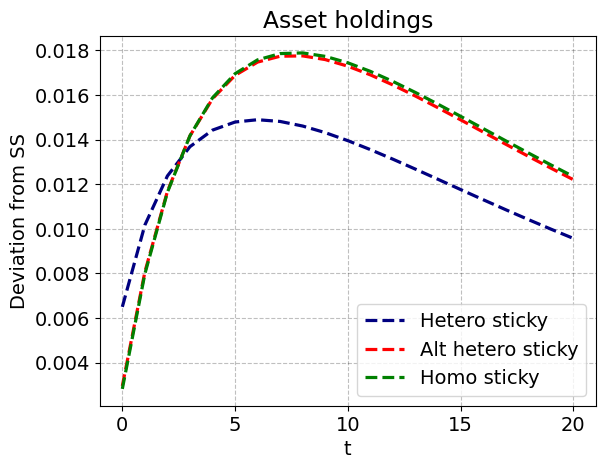

In [73]:
plt.plot(model_B_het.IRF['A_hh'][:21], label='Hetero sticky', linestyle='--', linewidth=2.3, color='navy')
plt.plot(model_B_thetatest.IRF['A_hh'][:21], label='Alt hetero sticky', linestyle='--', linewidth=2.3, color='red')
plt.plot(model_sticky_B.IRF['A_hh'][:21], label='Homo sticky', linestyle='--', linewidth=2.3, color='green')
plt.title('Asset holdings')
plt.ylabel("Deviation from SS")
plt.xlabel("t")
plt.legend()
plt.show()

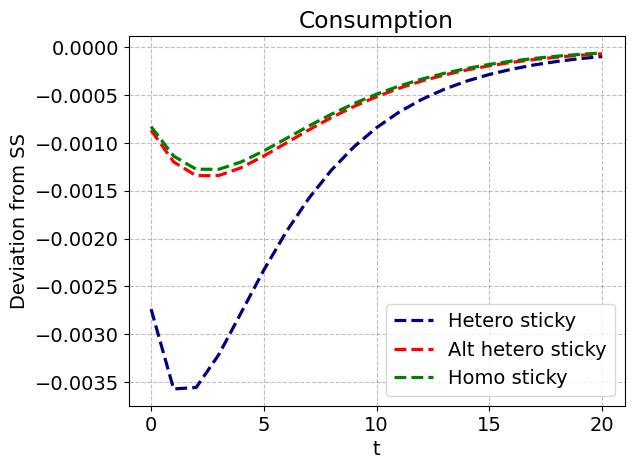

In [74]:
plt.plot(model_B_het.IRF['C_hh'][:21], label='Hetero sticky', linestyle='--', linewidth=2.3, color='navy')
plt.plot(model_B_thetatest.IRF['C_hh'][:21], label='Alt hetero sticky', linestyle='--', linewidth=2.3, color='red')
plt.plot(model_sticky_B.IRF['C_hh'][:21], label='Homo sticky', linestyle='--', linewidth=2.3, color='green')
plt.title('Consumption')
plt.ylabel("Deviation from SS")
plt.xlabel("t")
plt.legend()
plt.show()

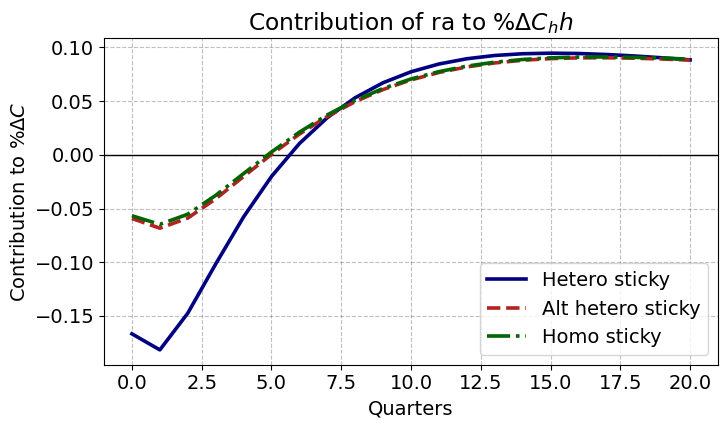

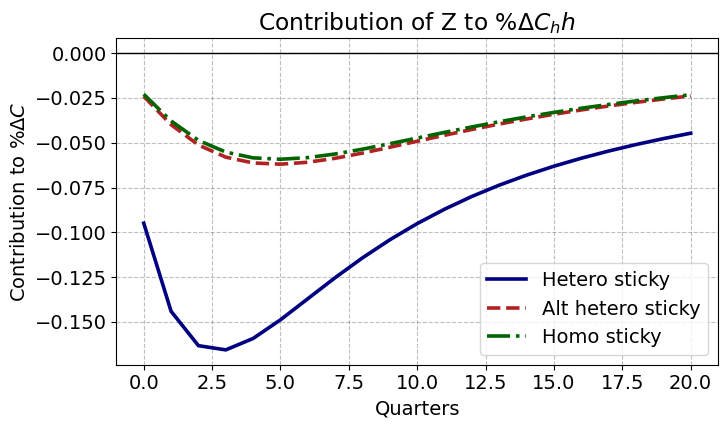

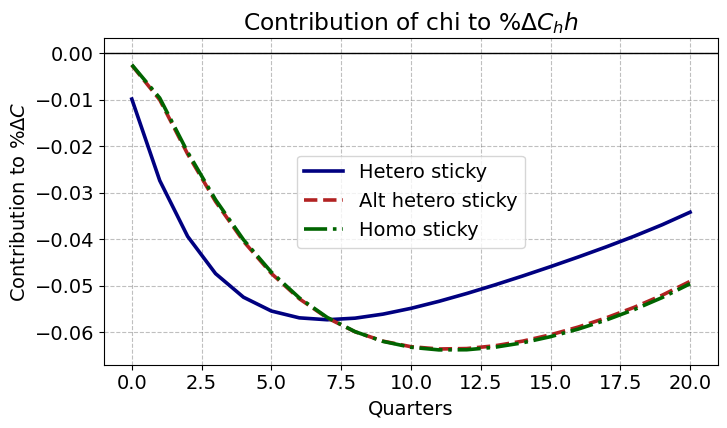

(array([-0.00986266, -0.02736851, -0.0393749 , -0.04737604, -0.05244845,
        -0.05541531, -0.05688255, -0.05728968, -0.05694895, -0.05608089,
        -0.05484048, -0.05333655, -0.05164506, -0.04981812, -0.04788962,
        -0.04587891, -0.04379166, -0.04161871, -0.03933186, -0.03687434,
        -0.03417429]),
 array([-0.00258386, -0.01002754, -0.02168219, -0.03188635, -0.04042407,
        -0.04734148, -0.05277505, -0.05689602, -0.0598804 , -0.06189296,
        -0.06308123, -0.06357379, -0.06348068, -0.06289426, -0.06189005,
        -0.06052737, -0.05884872, -0.05687754, -0.0546133 , -0.05202086,
        -0.0490428 ]),
 array([-0.00248698, -0.00963446, -0.02126567, -0.03149472, -0.04008607,
        -0.04707395, -0.0525866 , -0.05678961, -0.05985525, -0.06194587,
        -0.06320743, -0.06376753, -0.06373564, -0.06320384, -0.06224759,
        -0.06092623, -0.0592824 , -0.05733976, -0.05509799, -0.05252216,
        -0.04955321]))

In [75]:
plot_input_effect_on_C(model_B_het, model_B_thetatest, model_sticky_B, label1="Hetero sticky", label2="Alt hetero sticky",label3="Homo sticky",inp="ra",  T=21)
plot_input_effect_on_C(model_B_het, model_B_thetatest, model_sticky_B, label1="Hetero sticky", label2="Alt hetero sticky",label3="Homo sticky",inp="Z",   T=21)
plot_input_effect_on_C(model_B_het, model_B_thetatest, model_sticky_B, label1="Hetero sticky", label2="Alt hetero sticky",label3="Homo sticky",inp="chi", T=21)